In [1]:
import numpy as np
import pandas as pd

import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.express as px
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first')

## Loading data

In [2]:
data = pd.read_csv("data/underwater_temperature.csv",encoding= 'unicode_escape')
data


,ID,Site,Latitude,Longitude,Date,Time,Temp (°C),Depth
0,1,Ilha Deserta,27.2706,48.3310,2013/02/20,11:40:02,24.448,12.0
1,2,Ilha Deserta,27.2706,48.3310,2013/02/20,12:00:03,24.448,12.0
2,3,Ilha Deserta,27.2706,48.3310,2013/02/20,12:20:04,24.545,12.0
3,4,Ilha Deserta,27.2706,48.3310,2013/02/20,12:40:05,24.448,12.0
4,5,Ilha Deserta,27.2706,48.3310,2013/02/20,13:00:06,24.351,12.0
...,...,...,...,...,...,...,...,...
408633,408634,lha do Xavier,27.6092,48.3858,2013/03/07,09:03:29,24.931,5.0
408634,408635,lha do Xavier,27.6092,48.3858,2013/03/07,09:23:29,24.931,5.0
408635,408636,lha do Xavier,27.6092,48.3858,2013/03/07,09:43:29,24.931,5.0
408636,408637,lha do Xavier,27.6092,48.3858,2013/03/07,10:03:29,24.931,5.0


# Exploring data

In [3]:
new_header = []
def change_titels(df):
    for i in df.columns:
        x = i.lower().replace(' ','_')
        new_header.append(x)
    df.columns = new_header
    display(df.head(2))
    
change_titels(data)

,id,site,latitude,longitude,date,time,temp_(°c),depth
0,1,Ilha Deserta,27.2706,48.331,2013/02/20,11:40:02,24.448,12.0
1,2,Ilha Deserta,27.2706,48.331,2013/02/20,12:00:03,24.448,12.0


In [4]:
data.describe()

,id,latitude,longitude,temp_(°c),depth
count,408638.000000,408638.000000,408638.000000,408634.000000,408638.000000
mean,204319.500000,27.385022,48.432279,20.759051,12.010513
std,117963.773987,0.509617,0.096028,2.980158,6.177916
min,1.000000,26.367900,48.331000,14.421000,5.000000
25%,102160.250000,27.180400,48.385800,18.236000,5.000000
50%,204319.500000,27.270600,48.408000,20.615000,12.000000
75%,306478.750000,27.611100,48.522000,23.100000,12.000000
max,408638.000000,28.446100,48.708700,29.252000,22.100000


# drop NaN 

In [5]:
data.isnull().sum()/len(data)

id           0.00000
site         0.00000
latitude     0.00000
longitude    0.00000
date         0.00000
time         0.00000
temp_(°c)    0.00001
depth        0.00000
dtype: float64

In [6]:
data[data['temp_(°c)'].isna()]

,id,site,latitude,longitude,date,time,temp_(°c),depth
119712,119713,Ilha da Galé,27.1719,48.408,2014/08/19,14:52:57,NaN,12.0
119713,119714,Ilha da Galé,27.1719,48.408,2014/08/19,14:52:58,NaN,12.0
119714,119715,Ilha da Galé,27.1719,48.408,2014/08/19,14:52:59,NaN,12.0
119715,119716,Ilha da Galé,27.1719,48.408,2014/08/19,14:53:00,NaN,12.0


I will drop these 4 colmuns 

In [7]:
data2=data.dropna(axis=0)
data2.reset_index(drop=True,inplace = True)
data2

,id,site,latitude,longitude,date,time,temp_(°c),depth
0,1,Ilha Deserta,27.2706,48.3310,2013/02/20,11:40:02,24.448,12.0
1,2,Ilha Deserta,27.2706,48.3310,2013/02/20,12:00:03,24.448,12.0
2,3,Ilha Deserta,27.2706,48.3310,2013/02/20,12:20:04,24.545,12.0
3,4,Ilha Deserta,27.2706,48.3310,2013/02/20,12:40:05,24.448,12.0
4,5,Ilha Deserta,27.2706,48.3310,2013/02/20,13:00:06,24.351,12.0
...,...,...,...,...,...,...,...,...
408629,408634,lha do Xavier,27.6092,48.3858,2013/03/07,09:03:29,24.931,5.0
408630,408635,lha do Xavier,27.6092,48.3858,2013/03/07,09:23:29,24.931,5.0
408631,408636,lha do Xavier,27.6092,48.3858,2013/03/07,09:43:29,24.931,5.0
408632,408637,lha do Xavier,27.6092,48.3858,2013/03/07,10:03:29,24.931,5.0


In [8]:
data2.isnull().sum()

id           0
site         0
latitude     0
longitude    0
date         0
time         0
temp_(°c)    0
depth        0
dtype: int64

explore "site"

In [9]:
data2['site'].value_counts(dropna=False) 

Ilha Deserta                   86152
Ilha da Galé                   50887
Tamboretes                     50798
Parcel do Xavier (Alalunga)    49690
Moleques do Sul                42467
Parcel da Pombinha             41438
lha do Xavier                  33773
Ilha do Coral                  28942
Ilha dos Lobos                 24487
Name: site, dtype: int64

In [10]:
data2['site'] = data2['site'].apply(lambda x: x.replace("(Alalunga)","") if "Xavier" in x else x)
data2['site'].value_counts()

/var/folders/2b/pl6pxkts27ndv0n10fzpqb5m0000gn/T/ipykernel_26975/3091673908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['site'] = data2['site'].apply(lambda x: x.replace("(Alalunga)","") if "Xavier" in x else x)


Ilha Deserta          86152
Ilha da Galé          50887
Tamboretes            50798
Parcel do Xavier      49690
Moleques do Sul       42467
Parcel da Pombinha    41438
lha do Xavier         33773
Ilha do Coral         28942
Ilha dos Lobos        24487
Name: site, dtype: int64

In [11]:
data2

,id,site,latitude,longitude,date,time,temp_(°c),depth
0,1,Ilha Deserta,27.2706,48.3310,2013/02/20,11:40:02,24.448,12.0
1,2,Ilha Deserta,27.2706,48.3310,2013/02/20,12:00:03,24.448,12.0
2,3,Ilha Deserta,27.2706,48.3310,2013/02/20,12:20:04,24.545,12.0
3,4,Ilha Deserta,27.2706,48.3310,2013/02/20,12:40:05,24.448,12.0
4,5,Ilha Deserta,27.2706,48.3310,2013/02/20,13:00:06,24.351,12.0
...,...,...,...,...,...,...,...,...
408629,408634,lha do Xavier,27.6092,48.3858,2013/03/07,09:03:29,24.931,5.0
408630,408635,lha do Xavier,27.6092,48.3858,2013/03/07,09:23:29,24.931,5.0
408631,408636,lha do Xavier,27.6092,48.3858,2013/03/07,09:43:29,24.931,5.0
408632,408637,lha do Xavier,27.6092,48.3858,2013/03/07,10:03:29,24.931,5.0


explore "depth"

In [12]:
data2['depth'].value_counts(dropna=False) 

12.0    187227
5.0     130279
22.1     49690
22.0     41438
Name: depth, dtype: int64

<AxesSubplot:xlabel='depth', ylabel='temp_(°c)'>

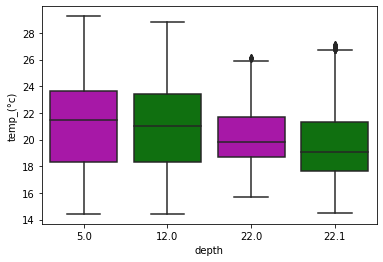

In [13]:
sns.boxplot(x="depth", y="temp_(°c)", palette=["m", "g"],
            data=data2)

In [238]:
data_corr=data2.loc[:, data2.columns != 'id']

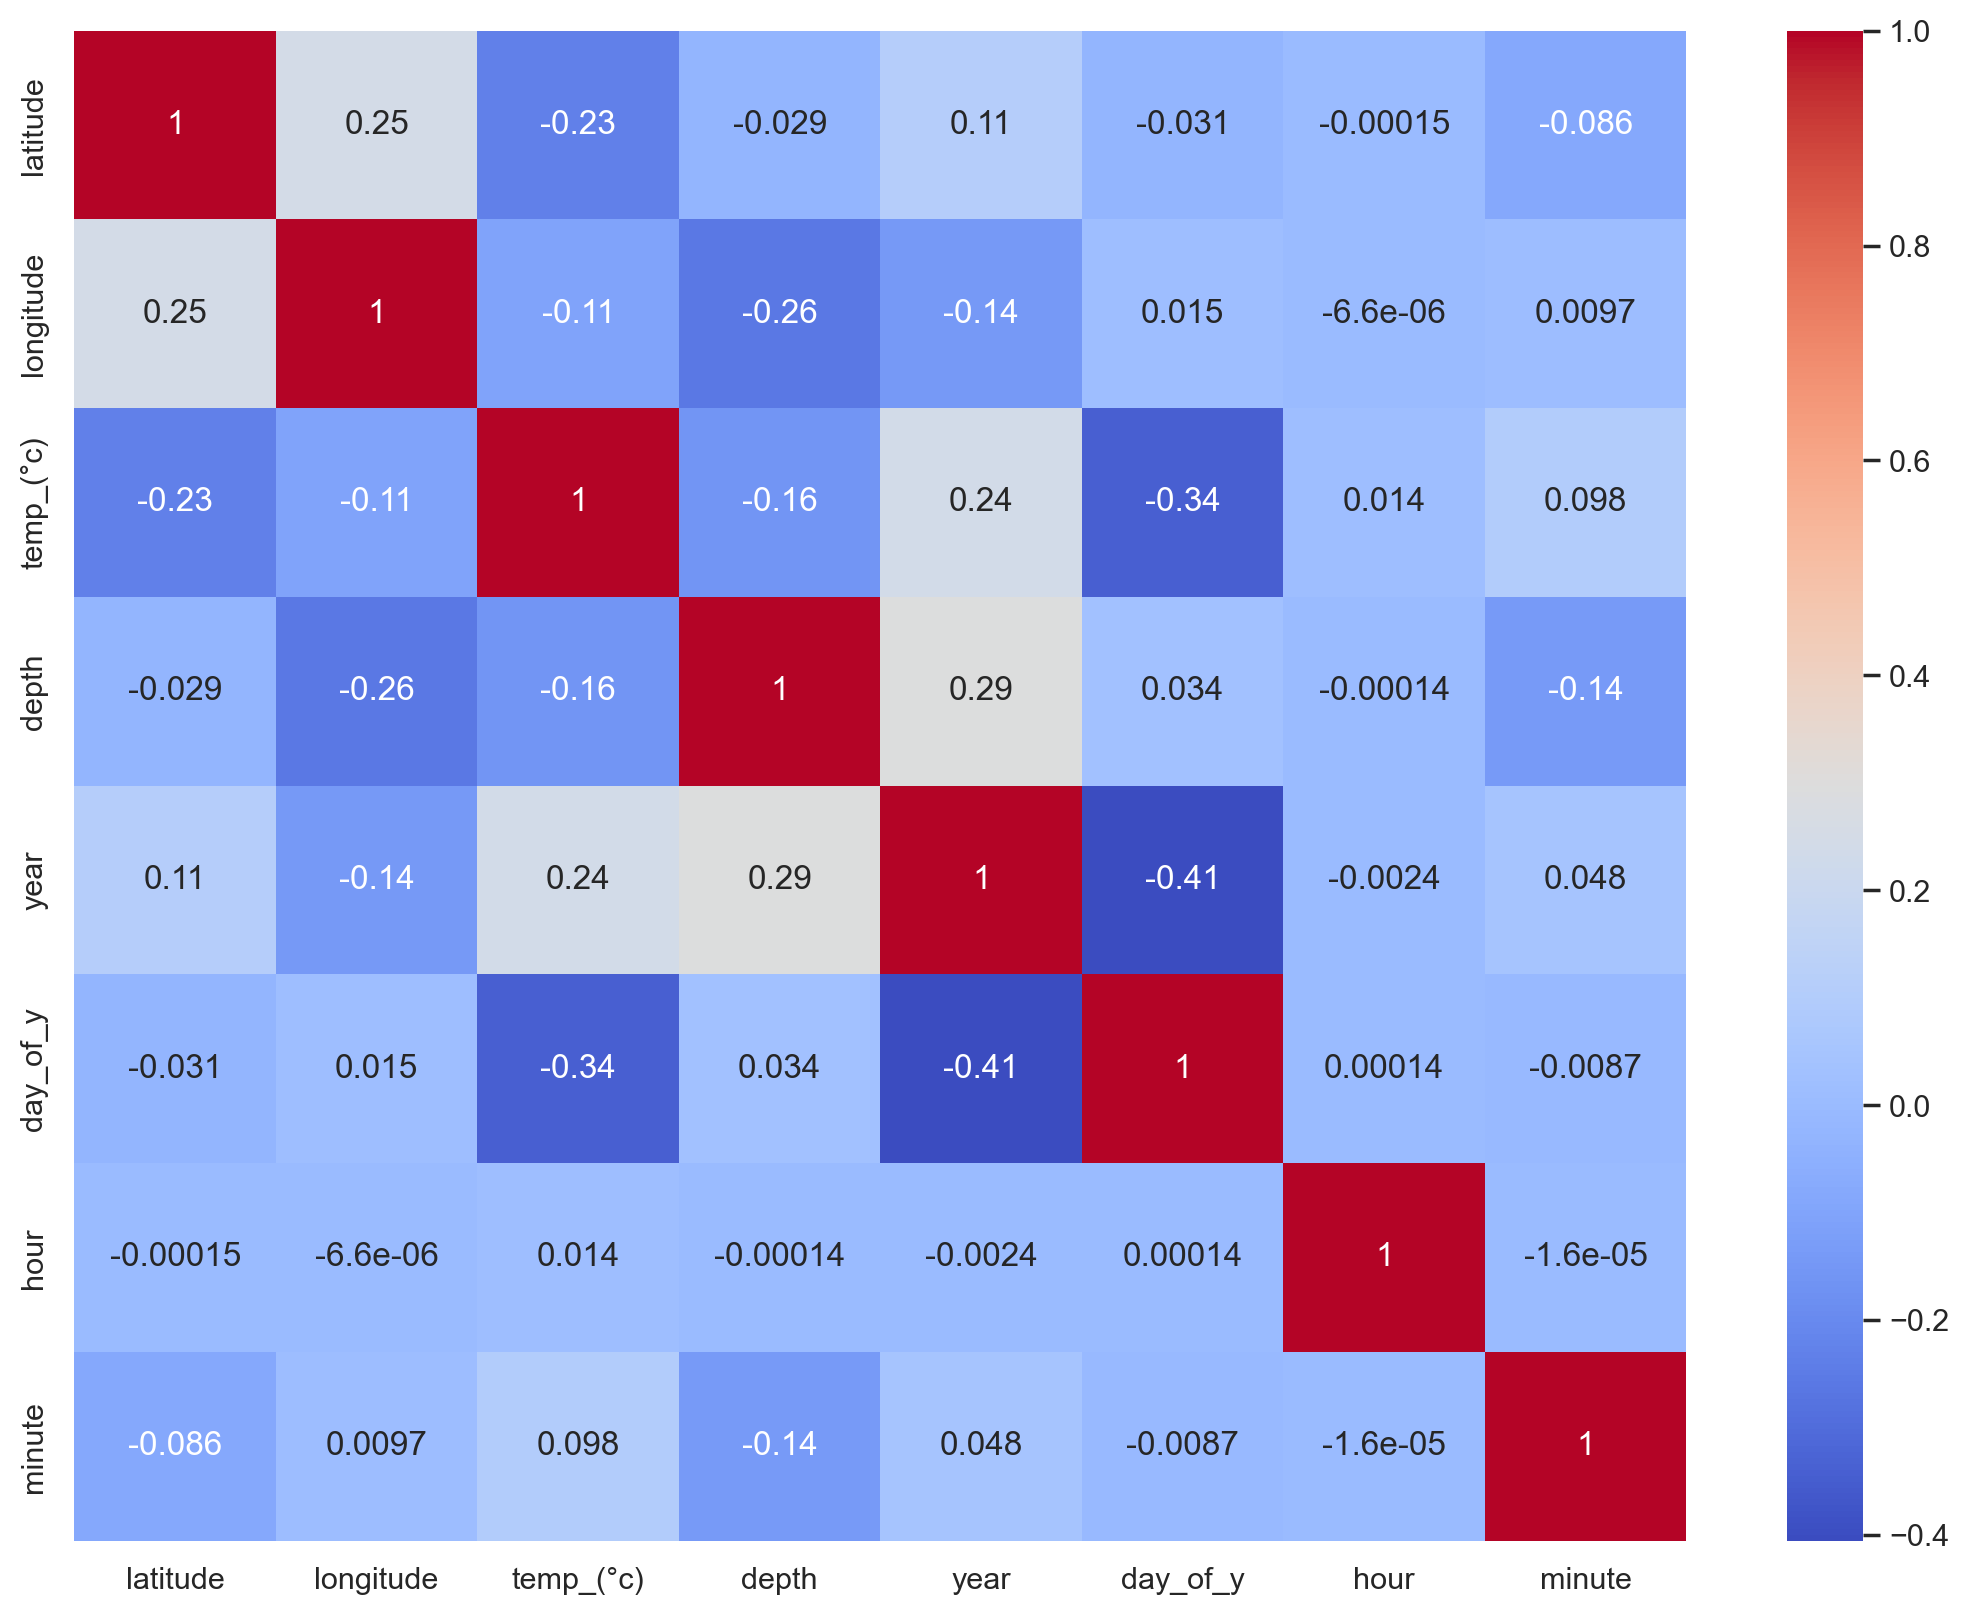

In [240]:
plt.figure(figsize = (13, 10), dpi=200)
sns.heatmap( data_corr.corr(), annot = True, cmap = "coolwarm")
plt.show()

<AxesSubplot:xlabel='site', ylabel='temp_(°c)'>

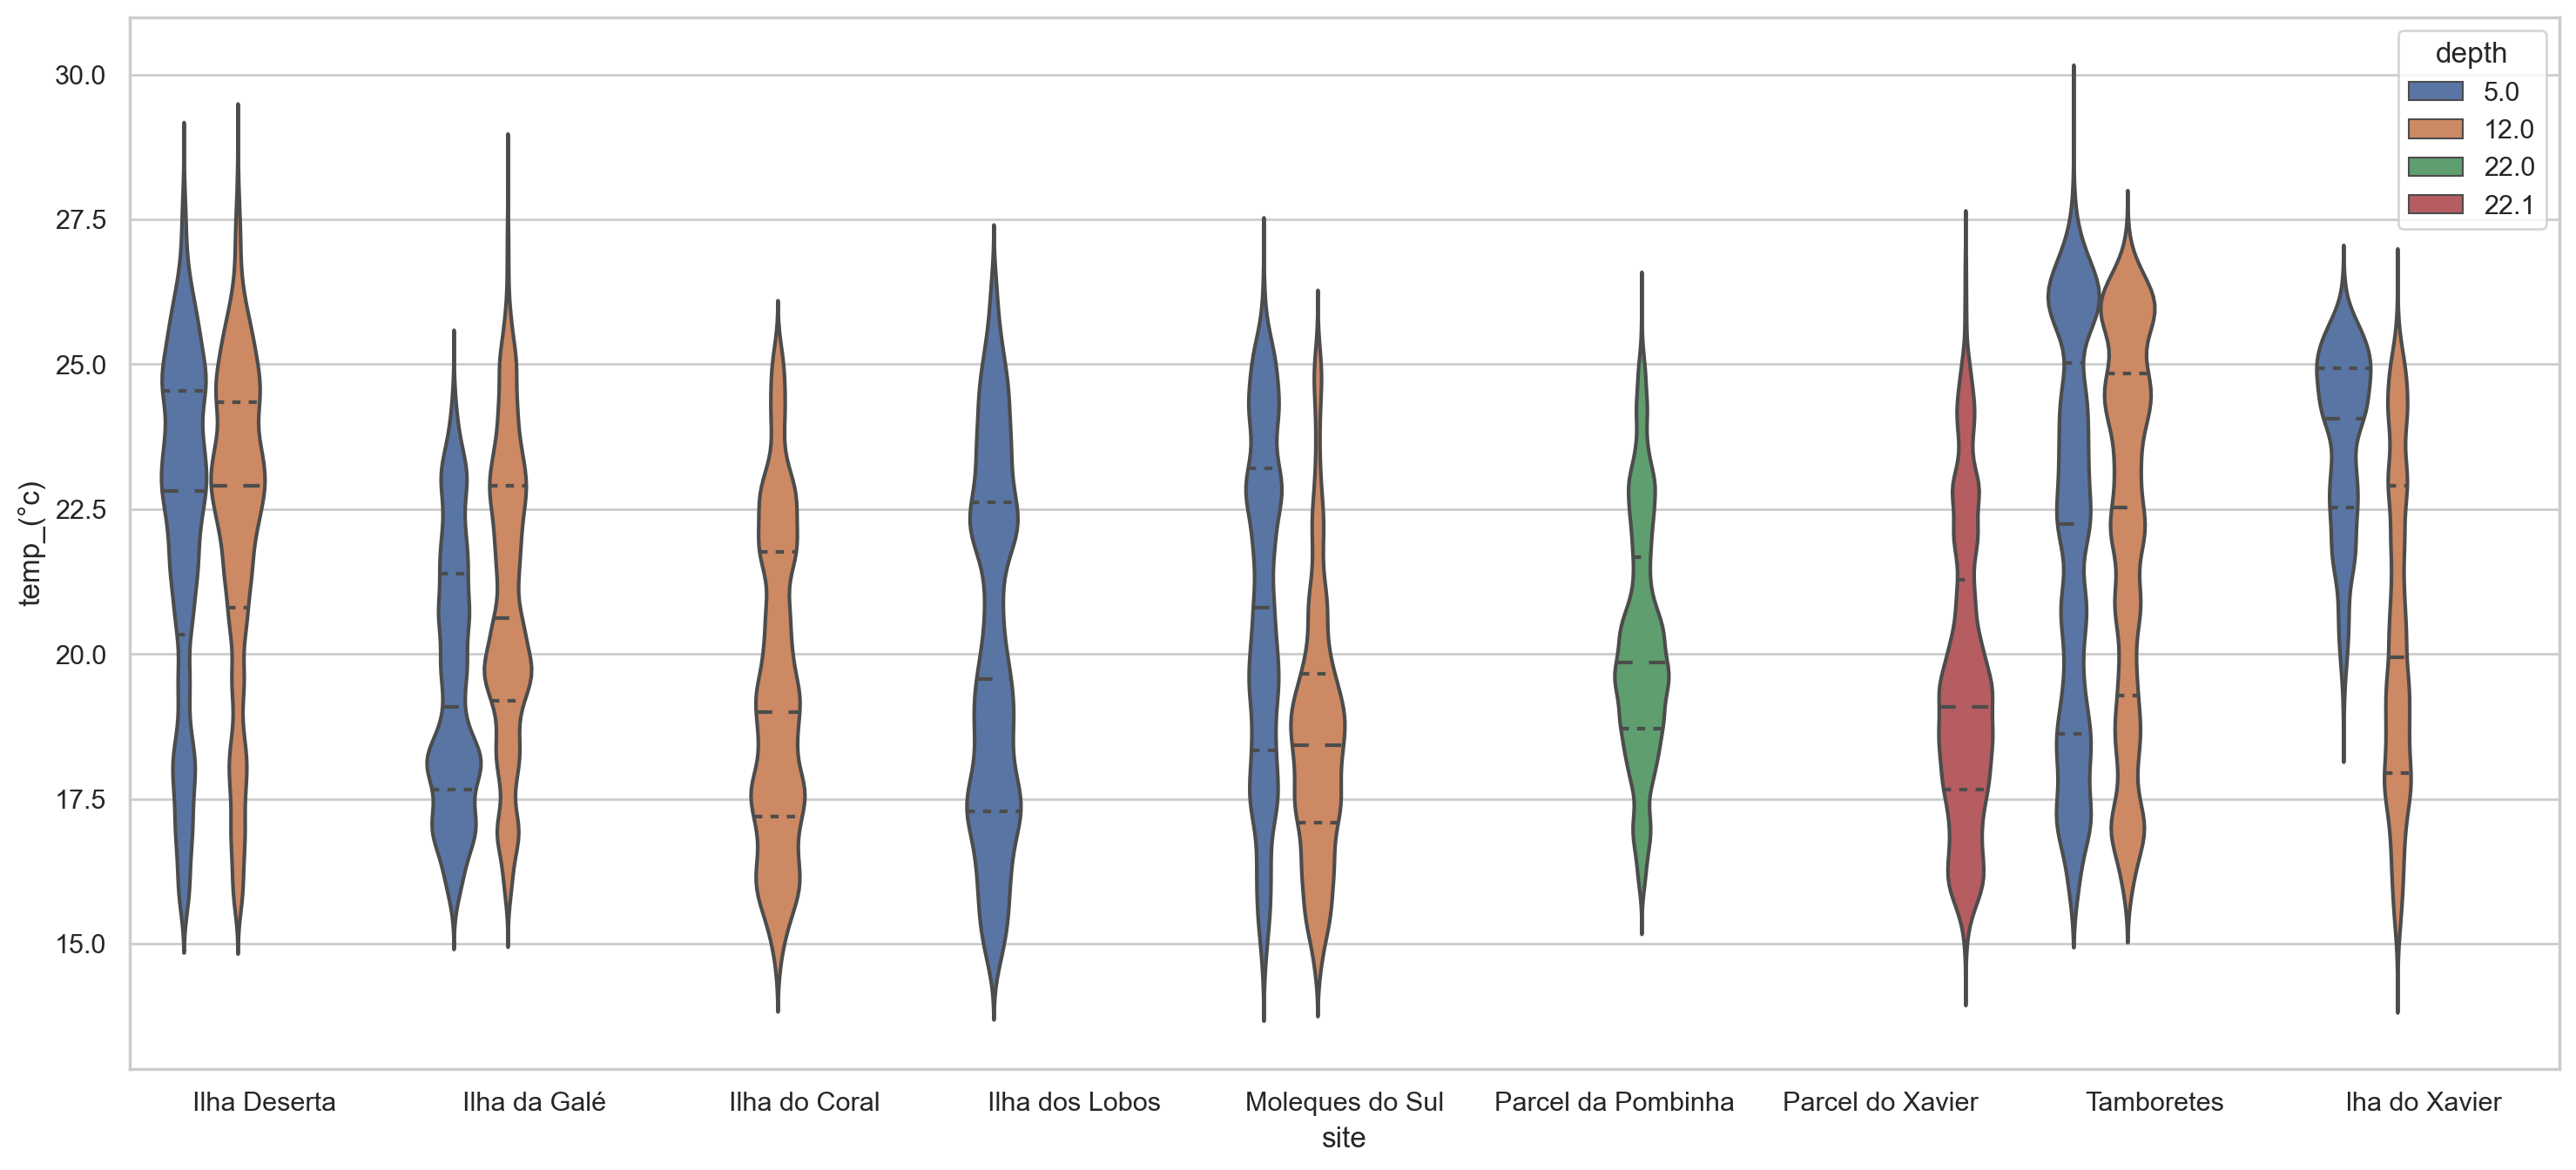

In [308]:
fig, ax1 = plt.subplots(figsize=(18,8), dpi=200) 
sns.set_theme(style="whitegrid")

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=data2, x="site", y="temp_(°c)",hue="depth", 
               inner="quart")



In [15]:
# plot to see how the temperature changes at different depths

In [16]:
data22=data2[data2['depth']==22.0]
data22.describe()

,id,latitude,longitude,temp_(°c),depth
count,41438.000000,4.143800e+04,4.143800e+04,41438.000000,41438.0
mean,253658.500000,2.718040e+01,4.840970e+01,20.166279,22.0
std,11962.264564,2.070547e-11,2.768308e-11,2.082355,0.0
min,232940.000000,2.718040e+01,4.840970e+01,15.664000,22.0
25%,243299.250000,2.718040e+01,4.840970e+01,18.711000,22.0
50%,253658.500000,2.718040e+01,4.840970e+01,19.853000,22.0
75%,264017.750000,2.718040e+01,4.840970e+01,21.664000,22.0
max,274377.000000,2.718040e+01,4.840970e+01,26.097000,22.0


In [17]:
data22_1=data2[data2['depth']==22.1]
data22_1.describe()

,id,latitude,longitude,temp_(°c),depth
count,49690.000000,4.969000e+04,4.969000e+04,49690.000000,4.969000e+04
mean,299222.500000,2.761110e+01,4.838820e+01,19.506198,2.210000e+01
std,14344.411775,1.196566e-11,3.266398e-11,2.516018,1.148959e-11
min,274378.000000,2.761110e+01,4.838820e+01,14.517000,2.210000e+01
25%,286800.250000,2.761110e+01,4.838820e+01,17.665000,2.210000e+01
50%,299222.500000,2.761110e+01,4.838820e+01,19.092000,2.210000e+01
75%,311644.750000,2.761110e+01,4.838820e+01,21.282000,2.210000e+01
max,324067.000000,2.761110e+01,4.838820e+01,27.075000,2.210000e+01


I will keep 22 and 22.1 bacause there is more difference than the other depth

<AxesSubplot:xlabel='temp_(°c)', ylabel='Count'>

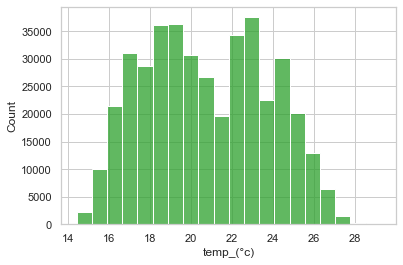

In [244]:
sns.histplot(x ='temp_(°c)',data = data2 ,bins = 20,color='tab:green')

<AxesSubplot:xlabel='date', ylabel='Count'>

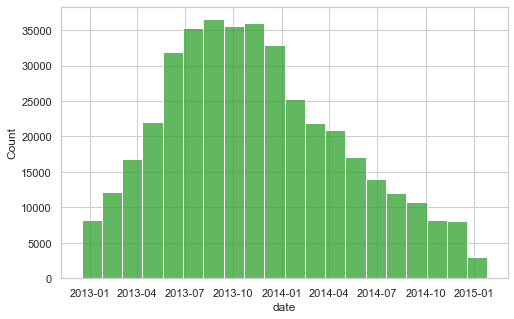

In [255]:
fig, ax = plt.subplots(figsize=[8,5])
sns.histplot(x ='date',data = data2,bins = 20,color='tab:green')

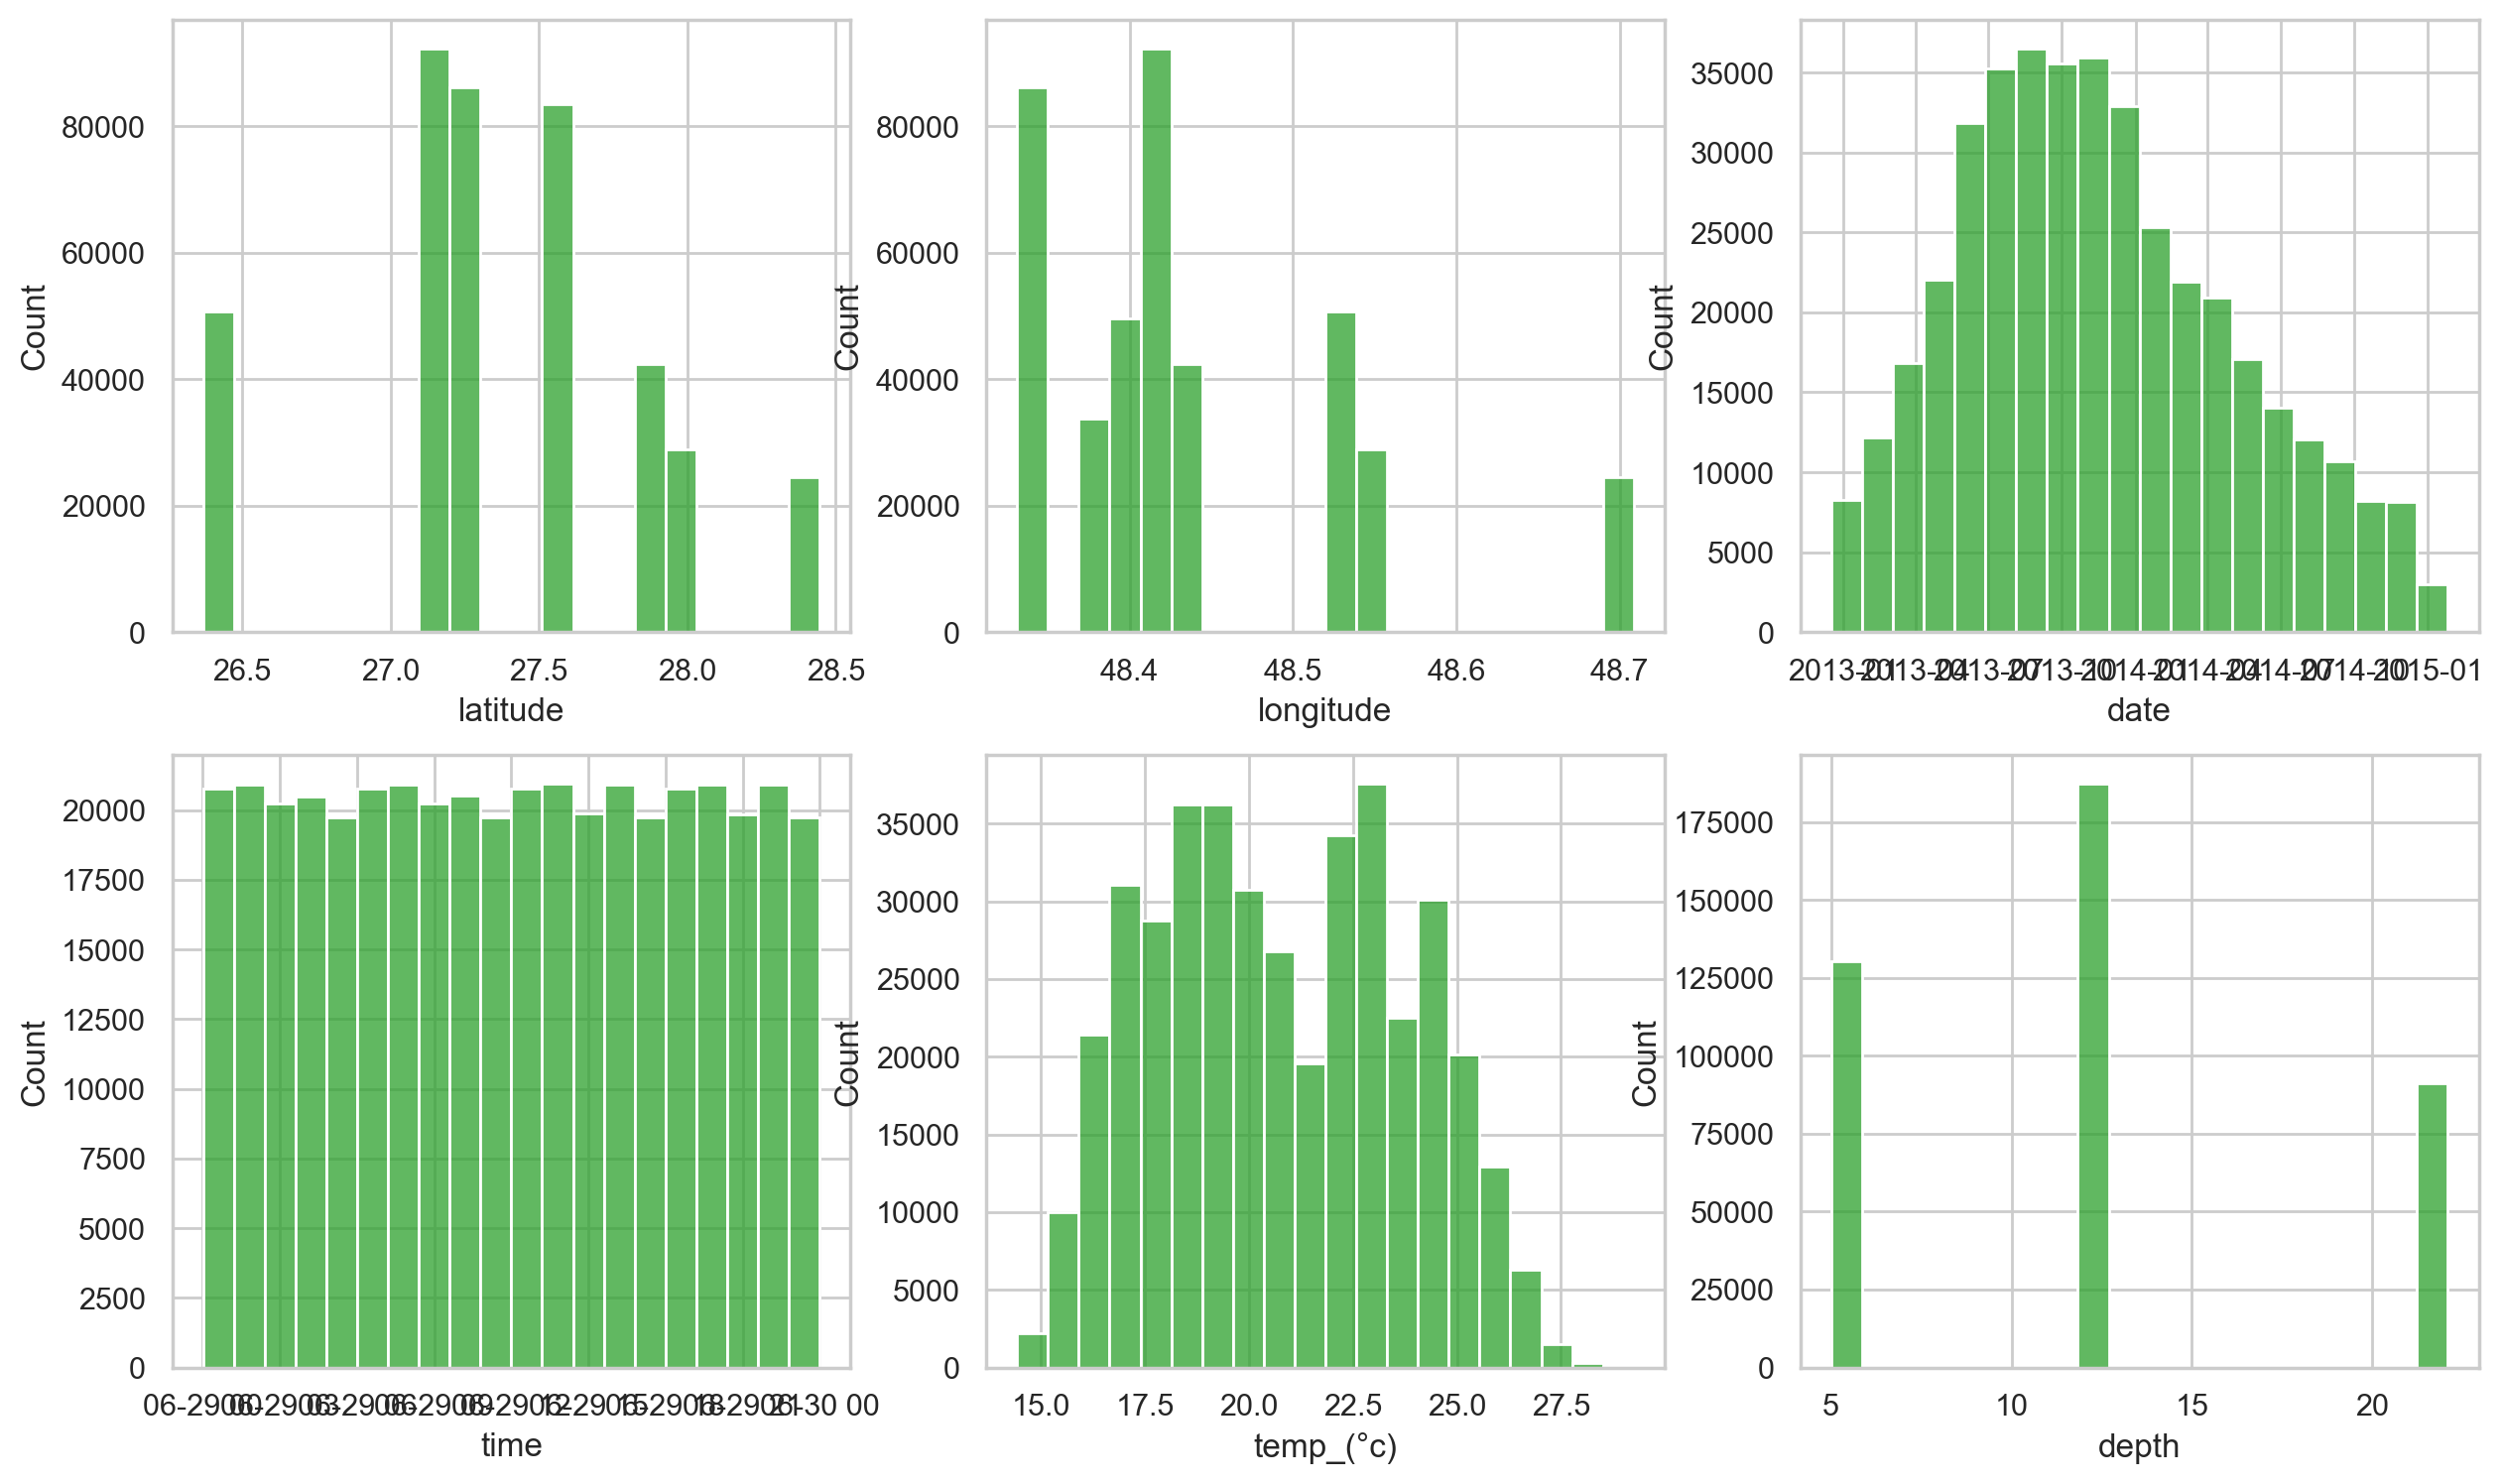

In [243]:
fig, ax1 = plt.subplots(2,3,figsize=(15,9), dpi=200) 
sns.histplot(x ='latitude',data = data2 ,bins = 20,color='tab:green', ax = ax1[0,0])
sns.histplot(x ='longitude',data = data2,bins = 20,color='tab:green', ax = ax1[0,1])
sns.histplot(x ='date',data = data2,bins = 20,color='tab:green', ax = ax1[0,2])
sns.histplot(x ='time',data = data2,bins = 20,color='tab:green', ax = ax1[1,0])
sns.histplot(x ='temp_(°c)',data = data2,bins = 20,color='tab:green', ax = ax1[1,1])
sns.histplot(x ='depth',data = data2 ,bins = 20,color='tab:green', ax = ax1[1,2])
plt.show()

In [20]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408634 entries, 0 to 408633
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         408634 non-null  int64  
 1   site       408634 non-null  object 
 2   latitude   408634 non-null  float64
 3   longitude  408634 non-null  float64
 4   date       408634 non-null  object 
 5   time       408634 non-null  object 
 6   temp_(°c)  408634 non-null  float64
 7   depth      408634 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 24.9+ MB


In [21]:
data2

,id,site,latitude,longitude,date,time,temp_(°c),depth
0,1,Ilha Deserta,27.2706,48.3310,2013/02/20,11:40:02,24.448,12.0
1,2,Ilha Deserta,27.2706,48.3310,2013/02/20,12:00:03,24.448,12.0
2,3,Ilha Deserta,27.2706,48.3310,2013/02/20,12:20:04,24.545,12.0
3,4,Ilha Deserta,27.2706,48.3310,2013/02/20,12:40:05,24.448,12.0
4,5,Ilha Deserta,27.2706,48.3310,2013/02/20,13:00:06,24.351,12.0
...,...,...,...,...,...,...,...,...
408629,408634,lha do Xavier,27.6092,48.3858,2013/03/07,09:03:29,24.931,5.0
408630,408635,lha do Xavier,27.6092,48.3858,2013/03/07,09:23:29,24.931,5.0
408631,408636,lha do Xavier,27.6092,48.3858,2013/03/07,09:43:29,24.931,5.0
408632,408637,lha do Xavier,27.6092,48.3858,2013/03/07,10:03:29,24.931,5.0


# Convert time and date in datatime 

In [22]:
data2['date'] = pd.to_datetime(data2['date'])
data2['time'] = pd.to_datetime(data2['time'])
data2.info()


/var/folders/2b/pl6pxkts27ndv0n10fzpqb5m0000gn/T/ipykernel_26975/1067601303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['date'] = pd.to_datetime(data2['date'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408634 entries, 0 to 408633
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         408634 non-null  int64         
 1   site       408634 non-null  object        
 2   latitude   408634 non-null  float64       
 3   longitude  408634 non-null  float64       
 4   date       408634 non-null  datetime64[ns]
 5   time       408634 non-null  datetime64[ns]
 6   temp_(°c)  408634 non-null  float64       
 7   depth      408634 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(1), object(1)
memory usage: 24.9+ MB


/var/folders/2b/pl6pxkts27ndv0n10fzpqb5m0000gn/T/ipykernel_26975/1067601303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['time'] = pd.to_datetime(data2['time'])


In [23]:
data2['year'] = data2['date'].dt.year
data2['day_of_y'] = data2['date'].dt.dayofyear
data2['hour'] = data2['time'].dt.hour
data2['minute'] = data2['time'].dt.minute
data2

/var/folders/2b/pl6pxkts27ndv0n10fzpqb5m0000gn/T/ipykernel_26975/609029626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['year'] = data2['date'].dt.year
/var/folders/2b/pl6pxkts27ndv0n10fzpqb5m0000gn/T/ipykernel_26975/609029626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['day_of_y'] = data2['date'].dt.dayofyear
/var/folders/2b/pl6pxkts27ndv0n10fzpqb5m0000gn/T/ipykernel_26975/609029626.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


,id,site,latitude,longitude,date,time,temp_(°c),depth,year,day_of_y,hour,minute
0,1,Ilha Deserta,27.2706,48.3310,2013-02-20,2022-06-29 11:40:02,24.448,12.0,2013,51,11,40
1,2,Ilha Deserta,27.2706,48.3310,2013-02-20,2022-06-29 12:00:03,24.448,12.0,2013,51,12,0
2,3,Ilha Deserta,27.2706,48.3310,2013-02-20,2022-06-29 12:20:04,24.545,12.0,2013,51,12,20
3,4,Ilha Deserta,27.2706,48.3310,2013-02-20,2022-06-29 12:40:05,24.448,12.0,2013,51,12,40
4,5,Ilha Deserta,27.2706,48.3310,2013-02-20,2022-06-29 13:00:06,24.351,12.0,2013,51,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...
408629,408634,lha do Xavier,27.6092,48.3858,2013-03-07,2022-06-29 09:03:29,24.931,5.0,2013,66,9,3
408630,408635,lha do Xavier,27.6092,48.3858,2013-03-07,2022-06-29 09:23:29,24.931,5.0,2013,66,9,23
408631,408636,lha do Xavier,27.6092,48.3858,2013-03-07,2022-06-29 09:43:29,24.931,5.0,2013,66,9,43
408632,408637,lha do Xavier,27.6092,48.3858,2013-03-07,2022-06-29 10:03:29,24.931,5.0,2013,66,10,3


In [24]:
data3=data2
display(data3)
data3.info()

,id,site,latitude,longitude,date,time,temp_(°c),depth,year,day_of_y,hour,minute
0,1,Ilha Deserta,27.2706,48.3310,2013-02-20,2022-06-29 11:40:02,24.448,12.0,2013,51,11,40
1,2,Ilha Deserta,27.2706,48.3310,2013-02-20,2022-06-29 12:00:03,24.448,12.0,2013,51,12,0
2,3,Ilha Deserta,27.2706,48.3310,2013-02-20,2022-06-29 12:20:04,24.545,12.0,2013,51,12,20
3,4,Ilha Deserta,27.2706,48.3310,2013-02-20,2022-06-29 12:40:05,24.448,12.0,2013,51,12,40
4,5,Ilha Deserta,27.2706,48.3310,2013-02-20,2022-06-29 13:00:06,24.351,12.0,2013,51,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...
408629,408634,lha do Xavier,27.6092,48.3858,2013-03-07,2022-06-29 09:03:29,24.931,5.0,2013,66,9,3
408630,408635,lha do Xavier,27.6092,48.3858,2013-03-07,2022-06-29 09:23:29,24.931,5.0,2013,66,9,23
408631,408636,lha do Xavier,27.6092,48.3858,2013-03-07,2022-06-29 09:43:29,24.931,5.0,2013,66,9,43
408632,408637,lha do Xavier,27.6092,48.3858,2013-03-07,2022-06-29 10:03:29,24.931,5.0,2013,66,10,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408634 entries, 0 to 408633
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         408634 non-null  int64         
 1   site       408634 non-null  object        
 2   latitude   408634 non-null  float64       
 3   longitude  408634 non-null  float64       
 4   date       408634 non-null  datetime64[ns]
 5   time       408634 non-null  datetime64[ns]
 6   temp_(°c)  408634 non-null  float64       
 7   depth      408634 non-null  float64       
 8   year       408634 non-null  int64         
 9   day_of_y   408634 non-null  int64         
 10  hour       408634 non-null  int64         
 11  minute     408634 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(5), object(1)
memory usage: 37.4+ MB


# One-Hot Encoding

site is the only column that is object so I will use hot encoding to make it numerical 

In [25]:
# select the column 
data_site = data3[['site']]
data_site

,site
0,Ilha Deserta
1,Ilha Deserta
2,Ilha Deserta
3,Ilha Deserta
4,Ilha Deserta
...,...
408629,lha do Xavier
408630,lha do Xavier
408631,lha do Xavier
408632,lha do Xavier


In [26]:
# generate binary values using get_dummies
encoder.fit(data_site)

data_site_encoded = encoder.transform(data_site).toarray()
data_site_encoded_df = pd.DataFrame(data_site_encoded, columns = encoder.get_feature_names_out())
data_site_encoded_df 

,site_Ilha da Galé,site_Ilha do Coral,site_Ilha dos Lobos,site_Moleques do Sul,site_Parcel da Pombinha,site_Parcel do Xavier,site_Tamboretes,site_lha do Xavier
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
408629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
408630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
408631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
408632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [27]:
# Merging with main df
data_full = pd.concat([data2,data_site_encoded_df], axis=1).drop(['site'], axis=1)
data_full.head()

,id,latitude,longitude,date,time,temp_(°c),depth,year,day_of_y,hour,minute,site_Ilha da Galé,site_Ilha do Coral,site_Ilha dos Lobos,site_Moleques do Sul,site_Parcel da Pombinha,site_Parcel do Xavier,site_Tamboretes,site_lha do Xavier
0,1,27.2706,48.331,2013-02-20,2022-06-29 11:40:02,24.448,12.0,2013,51,11,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,27.2706,48.331,2013-02-20,2022-06-29 12:00:03,24.448,12.0,2013,51,12,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,27.2706,48.331,2013-02-20,2022-06-29 12:20:04,24.545,12.0,2013,51,12,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,27.2706,48.331,2013-02-20,2022-06-29 12:40:05,24.448,12.0,2013,51,12,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,27.2706,48.331,2013-02-20,2022-06-29 13:00:06,24.351,12.0,2013,51,13,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [256]:
data_full_dropped= data_full.drop(['date', 'time', 'id' ], axis=1)
data_full_dropped.head()


,latitude,longitude,temp_(°c),depth,year,day_of_y,hour,minute,site_Ilha da Galé,site_Ilha do Coral,site_Ilha dos Lobos,site_Moleques do Sul,site_Parcel da Pombinha,site_Parcel do Xavier,site_Tamboretes,site_lha do Xavier
0,27.2706,48.331,24.448,12.0,2013,51,11,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,27.2706,48.331,24.448,12.0,2013,51,12,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,27.2706,48.331,24.545,12.0,2013,51,12,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,27.2706,48.331,24.448,12.0,2013,51,12,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,27.2706,48.331,24.351,12.0,2013,51,13,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Test different ML Models to determine the most accurate model to predict temp column

test, train split

In [288]:
from sklearn.model_selection import train_test_split
y=data_full_dropped['temp_(°c)']
X=data_full_dropped.drop(['temp_(°c)'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


display(X_train)
display(X_train.shape)
display(X_test)
display(X_test.shape)
display(y_train)
display(y_train.shape)
display(y_test)
display(y_test.shape)

,latitude,longitude,depth,year,day_of_y,hour,minute,site_Ilha da Galé,site_Ilha do Coral,site_Ilha dos Lobos,site_Moleques do Sul,site_Parcel da Pombinha,site_Parcel do Xavier,site_Tamboretes,site_lha do Xavier
145576,27.9354,48.5451,12.0,2013,232,2,21,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6937,27.2706,48.3310,12.0,2013,147,20,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158855,27.9354,48.5451,12.0,2014,51,12,41,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
403094,27.6092,48.3858,12.0,2014,58,14,42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
288868,27.6111,48.3882,22.1,2013,267,19,41,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,27.1804,48.4097,22.0,2014,137,15,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
365838,26.3679,48.5220,5.0,2013,256,3,53,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
131932,27.1719,48.4080,5.0,2013,263,4,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146867,27.9354,48.5451,12.0,2013,250,0,41,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


(286043, 15)

,latitude,longitude,depth,year,day_of_y,hour,minute,site_Ilha da Galé,site_Ilha do Coral,site_Ilha dos Lobos,site_Moleques do Sul,site_Parcel da Pombinha,site_Parcel do Xavier,site_Tamboretes,site_lha do Xavier
296645,27.6111,48.3882,22.1,2014,10,20,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
398804,27.6092,48.3858,12.0,2013,364,0,42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
179670,28.4461,48.7087,5.0,2013,355,18,35,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
28780,27.2706,48.3310,12.0,2014,86,5,38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133026,27.1719,48.4080,5.0,2013,278,8,42,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350826,26.3884,48.5250,12.0,2013,358,2,26,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
247920,27.1804,48.4097,22.0,2013,346,6,25,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
376107,27.6092,48.3858,12.0,2013,48,18,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25237,27.2706,48.3310,12.0,2014,37,0,38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(122591, 15)

145576    15.569
6937      20.615
158855    19.187
403094    18.045
288868    18.426
           ...  
259178    22.429
365838    18.711
131932    17.950
146867    15.951
121958    21.664
Name: temp_(°c), Length: 286043, dtype: float64

(286043,)

296645    16.999
398804    16.046
179670    23.869
28780     25.028
133026    19.092
           ...  
350826    25.805
247920    23.677
376107    19.948
25237     21.091
339096    18.236
Name: temp_(°c), Length: 122591, dtype: float64

(122591,)

# Normalization

In [289]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# LinearRegression

In [290]:
from sklearn import linear_model
from sklearn.metrics import r2_score

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [291]:
y_pred_test = reg.predict(X_test)

In [292]:
y_pred_train=reg.predict(X_train)

In [293]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
results

,Actual,Predicted
296645,16.999,21.314610
398804,16.046,18.781252
179670,23.869,18.315872
28780,25.028,23.415911
133026,19.092,19.736145
...,...,...
350826,25.805,20.828278
247920,23.677,18.329304
376107,19.948,21.122818
25237,21.091,23.735411


In [294]:
r2_score(y_train, y_pred_train)

0.26815867284574524

In [295]:
r2_score(y_test, y_pred_test)

0.272876549629508

In [296]:
from sklearn.metrics import mean_squared_error
# Comptuing the RMSE -> root mean squared error.
np.sqrt(mean_squared_error(y_test,y_pred_test))

2.540307461422934

In [286]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred_test))
rmse

2.540307461422934

In [287]:
pd.DataFrame({'train':round(r2_score(y_train, y_pred_train),2),'test':round(r2_score(y_test, y_pred_test),2)}, index=['Linear Model'])

,train,test
Linear Model,0.27,0.27


In [267]:
print(reg.intercept_)
print(reg.coef_)

13284286697.511131
[-3.05831445e+10  3.79816991e+10 -8.80361557e-01  3.84107971e+00
 -2.60696959e+00  1.40196664e-01  1.64839268e-01 -9.19564412e+09
 -1.17466922e+10 -2.06828412e+10 -1.67764340e+09 -9.24150951e+09
 -7.41204440e+08 -3.24913413e+10 -5.27819973e+08]


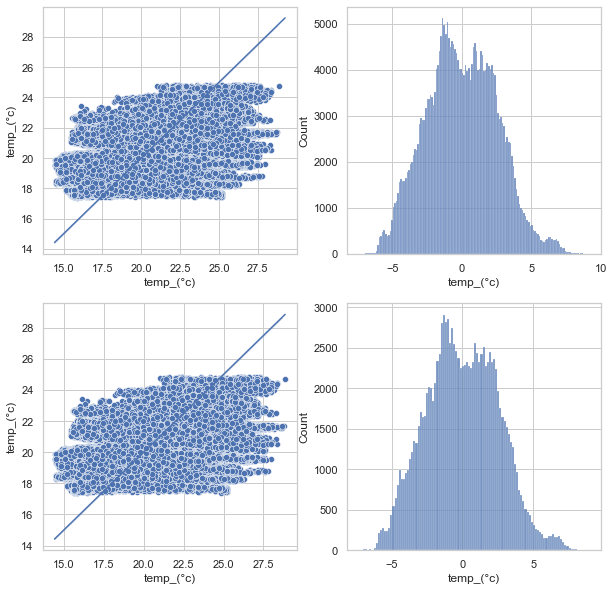

In [268]:
fig, ax=plt.subplots(2,2, figsize =(10,10))
sns.scatterplot(y=y_pred_test, x=y_test, ax=ax[0,0])
sns.lineplot(y=y_train, x=y_train, ax=ax[0,0])
sns.histplot(x=y_train-y_pred_train, ax=ax[0,1])
sns.scatterplot(y=y_pred_test, x=y_test, ax=ax[1,0])
sns.lineplot(y=y_test, x=y_test, ax=ax[1,0])
sns.histplot(x=y_test-y_pred_test, ax=ax[1,1])
plt.show()

# Random Forest Regressor

In [269]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=16, random_state=0)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=16, random_state=0)

In [270]:
y_pred_train = rfr.predict(X_train)
y_pred_test = rfr.predict(X_test)

In [271]:
rfr.score(X_train, y_train)

0.9909053680903684

In [272]:
rfr.score(X_test, y_test)

0.9861446644354913

In [298]:
pd.DataFrame({'train':[0.27, 0.99],'test': [0.26,0.98]},index=['Linear Model','Random Forest'])

,train,test
Linear Model,0.27,0.26
Random Forest,0.99,0.98


In [273]:
results_rfr = pd.concat([pd.DataFrame({'Actual': y_train, 'Predicted': y_pred_train, "Set": ["Train"]*y_pred_train.shape[0]}),
                         pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test, "Set": ["Test"]*y_pred_test.shape[0]})],
                        axis=0)
#results_rfr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test, "Set": ["Test"]*y_pred_test.shape[0]})
results_rfr["Residuals"] = results_rfr["Actual"] - results_rfr["Predicted"]
results_rfr

,Actual,Predicted,Set,Residuals
145576,15.569,15.537631,Train,0.031369
6937,20.615,20.617059,Train,-0.002059
158855,19.187,19.677993,Train,-0.490993
403094,18.045,18.416975,Train,-0.371975
288868,18.426,18.521407,Train,-0.095407
...,...,...,...,...
350826,25.805,25.853476,Test,-0.048476
247920,23.677,23.266491,Test,0.410509
376107,19.948,20.497367,Test,-0.549367
25237,21.091,22.232702,Test,-1.141702


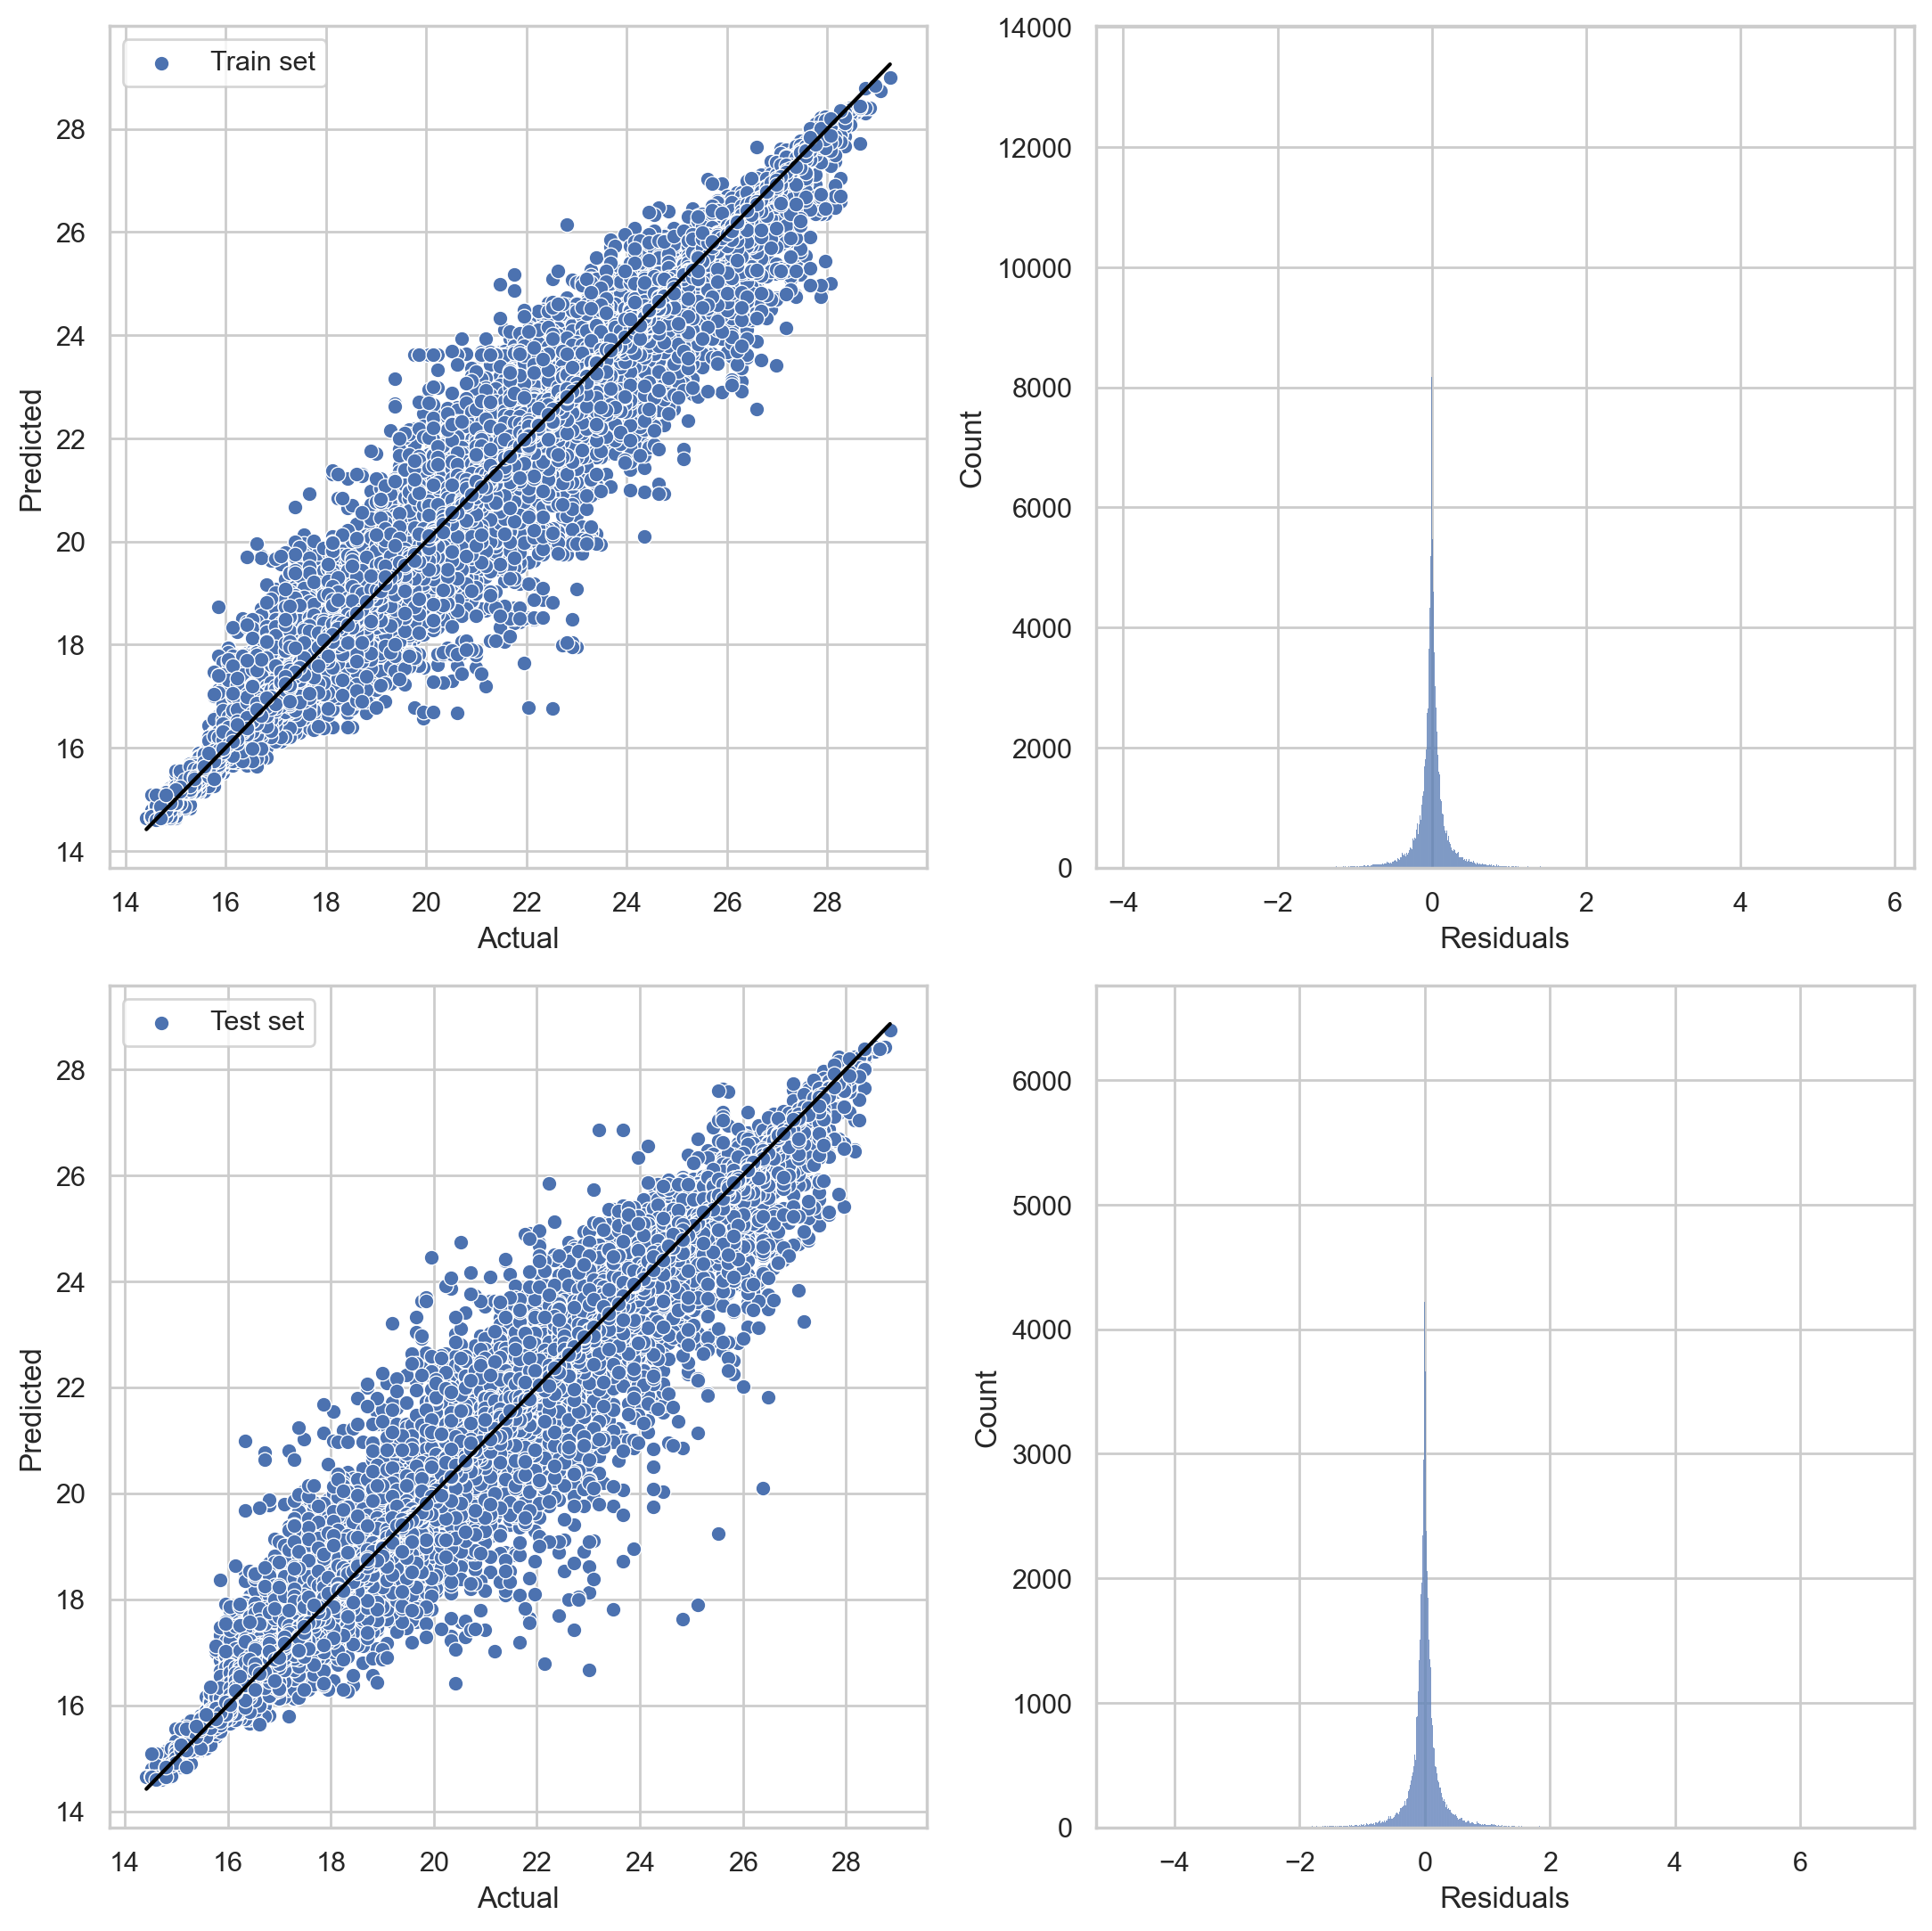

In [274]:
fig, ax=plt.subplots(2,2, figsize =(11,11), dpi= 200)
sns.scatterplot(data = results_rfr[results_rfr['Set']=="Train"], y="Predicted", x="Actual", ax=ax[0,0], label = "Train set")
sns.lineplot(data = results_rfr[results_rfr['Set']=="Train"], y="Actual", x="Actual", ax=ax[0,0], color = "black")
sns.histplot(data = results_rfr[results_rfr['Set']=="Train"], x="Residuals", ax=ax[0,1], label ="Train set")
sns.scatterplot(data = results_rfr[results_rfr['Set']=="Test"], y="Predicted", x="Actual", ax=ax[1,0], label = "Test set")
sns.lineplot(data = results_rfr[results_rfr['Set']=="Test"], y="Actual", x="Actual", ax=ax[1,0], color = "black")
sns.histplot(data = results_rfr[results_rfr['Set']=="Test"], x="Residuals", ax=ax[1,1], label ="Test set")
plt.tight_layout()
plt.show()

In [275]:
data_full

,id,latitude,longitude,date,time,temp_(°c),depth,year,day_of_y,hour,minute,site_Ilha da Galé,site_Ilha do Coral,site_Ilha dos Lobos,site_Moleques do Sul,site_Parcel da Pombinha,site_Parcel do Xavier,site_Tamboretes,site_lha do Xavier
0,1,27.2706,48.3310,2013-02-20,2022-06-29 11:40:02,24.448,12.0,2013,51,11,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,27.2706,48.3310,2013-02-20,2022-06-29 12:00:03,24.448,12.0,2013,51,12,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,27.2706,48.3310,2013-02-20,2022-06-29 12:20:04,24.545,12.0,2013,51,12,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,27.2706,48.3310,2013-02-20,2022-06-29 12:40:05,24.448,12.0,2013,51,12,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,27.2706,48.3310,2013-02-20,2022-06-29 13:00:06,24.351,12.0,2013,51,13,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408629,408634,27.6092,48.3858,2013-03-07,2022-06-29 09:03:29,24.931,5.0,2013,66,9,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
408630,408635,27.6092,48.3858,2013-03-07,2022-06-29 09:23:29,24.931,5.0,2013,66,9,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
408631,408636,27.6092,48.3858,2013-03-07,2022-06-29 09:43:29,24.931,5.0,2013,66,9,43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
408632,408637,27.6092,48.3858,2013-03-07,2022-06-29 10:03:29,24.931,5.0,2013,66,10,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


The random forest is the best model to predict temperature on the full dataset. Now I will use time series to predict more specifically the temerature in a single site and depth. 

# Grupping by and selections

In [48]:
data_grouped1=data3.groupby(['date', 'site','latitude','longitude', "depth"]).agg({'temp_(°c)':np.mean}).reset_index()
data_grouped1

,date,site,latitude,longitude,depth,temp_(°c)
0,2012-12-17,Tamboretes,26.3679,48.5220,5.0,26.511541
1,2012-12-17,Tamboretes,26.3884,48.5250,12.0,24.980318
2,2012-12-18,Moleques do Sul,27.8454,48.4318,5.0,21.792656
3,2012-12-18,Tamboretes,26.3679,48.5220,5.0,26.599069
4,2012-12-18,Tamboretes,26.3884,48.5250,12.0,24.823222
...,...,...,...,...,...,...
5686,2015-01-22,Parcel do Xavier,27.6111,48.3882,22.1,26.535319
5687,2015-01-23,Parcel do Xavier,27.6111,48.3882,22.1,25.888903
5688,2015-01-24,Parcel do Xavier,27.6111,48.3882,22.1,25.637833
5689,2015-01-25,Parcel do Xavier,27.6111,48.3882,22.1,24.488653


In [49]:
data_grouped1_5=data_grouped1[data_grouped1['depth']== 5.0].reset_index(drop=True)
data_grouped1_5

,date,site,latitude,longitude,depth,temp_(°c)
0,2012-12-17,Tamboretes,26.3679,48.5220,5.0,26.511541
1,2012-12-18,Moleques do Sul,27.8454,48.4318,5.0,21.792656
2,2012-12-18,Tamboretes,26.3679,48.5220,5.0,26.599069
3,2012-12-19,Moleques do Sul,27.8454,48.4318,5.0,22.871639
4,2012-12-19,Tamboretes,26.3679,48.5220,5.0,26.815153
...,...,...,...,...,...,...
1812,2014-07-29,Ilha Deserta,27.2706,48.3310,5.0,20.498264
1813,2014-07-30,Ilha Deserta,27.2706,48.3310,5.0,21.464069
1814,2014-07-31,Ilha Deserta,27.2706,48.3310,5.0,20.833639
1815,2014-08-01,Ilha Deserta,27.2706,48.3310,5.0,21.149917


In [50]:
data_grouped1_12=data_grouped1[data_grouped1['depth']== 12.0].reset_index(drop=True)
data_grouped1_12

,date,site,latitude,longitude,depth,temp_(°c)
0,2012-12-17,Tamboretes,26.3884,48.525,12.0,24.980318
1,2012-12-18,Tamboretes,26.3884,48.525,12.0,24.823222
2,2012-12-19,Tamboretes,26.3884,48.525,12.0,22.993542
3,2012-12-20,Tamboretes,26.3884,48.525,12.0,21.366319
4,2012-12-21,Tamboretes,26.3884,48.525,12.0,21.983556
...,...,...,...,...,...,...
2601,2014-12-17,Ilha Deserta,27.2706,48.331,12.0,26.073028
2602,2014-12-18,Ilha Deserta,27.2706,48.331,12.0,26.601639
2603,2014-12-19,Ilha Deserta,27.2706,48.331,12.0,26.564375
2604,2014-12-20,Ilha Deserta,27.2706,48.331,12.0,26.248444


In [51]:
data_grouped1_22=data_grouped1[data_grouped1['depth']== 22.0].reset_index(drop=True)
data_grouped1_22

,date,site,latitude,longitude,depth,temp_(°c)
0,2013-05-10,Parcel da Pombinha,27.1804,48.4097,22.0,22.895027
1,2013-05-11,Parcel da Pombinha,27.1804,48.4097,22.0,22.874889
2,2013-05-12,Parcel da Pombinha,27.1804,48.4097,22.0,22.910667
3,2013-05-13,Parcel da Pombinha,27.1804,48.4097,22.0,22.901333
4,2013-05-14,Parcel da Pombinha,27.1804,48.4097,22.0,22.890667
...,...,...,...,...,...,...
572,2014-12-10,Parcel da Pombinha,27.1804,48.4097,22.0,18.152167
573,2014-12-11,Parcel da Pombinha,27.1804,48.4097,22.0,17.803542
574,2014-12-12,Parcel da Pombinha,27.1804,48.4097,22.0,17.748125
575,2014-12-13,Parcel da Pombinha,27.1804,48.4097,22.0,17.664972


In [52]:
data_grouped1_22['date'].count()

577

In [53]:
data_grouped1_221=data_grouped1[data_grouped1['depth']== 22.1].reset_index(drop=True)
data_grouped1_221

,date,site,latitude,longitude,depth,temp_(°c)
0,2013-03-07,Parcel do Xavier,27.6111,48.3882,22.1,23.767694
1,2013-03-08,Parcel do Xavier,27.6111,48.3882,22.1,23.969222
2,2013-03-09,Parcel do Xavier,27.6111,48.3882,22.1,22.727278
3,2013-03-10,Parcel do Xavier,27.6111,48.3882,22.1,23.081639
4,2013-03-11,Parcel do Xavier,27.6111,48.3882,22.1,23.994347
...,...,...,...,...,...,...
686,2015-01-22,Parcel do Xavier,27.6111,48.3882,22.1,26.535319
687,2015-01-23,Parcel do Xavier,27.6111,48.3882,22.1,25.888903
688,2015-01-24,Parcel do Xavier,27.6111,48.3882,22.1,25.637833
689,2015-01-25,Parcel do Xavier,27.6111,48.3882,22.1,24.488653


In [54]:
data_grouped1_221['date'].count()

691

In [55]:
data_grouped2=data3.groupby(['date', 'site']).agg({'temp_(°c)':np.mean}).reset_index()
data_grouped2

,date,site,temp_(°c)
0,2012-12-17,Tamboretes,25.679765
1,2012-12-18,Moleques do Sul,21.792656
2,2012-12-18,Tamboretes,25.711146
3,2012-12-19,Moleques do Sul,22.871639
4,2012-12-19,Tamboretes,24.904347
...,...,...,...
4406,2015-01-22,Parcel do Xavier,26.535319
4407,2015-01-23,Parcel do Xavier,25.888903
4408,2015-01-24,Parcel do Xavier,25.637833
4409,2015-01-25,Parcel do Xavier,24.488653


<AxesSubplot:xlabel='temp_(°c)', ylabel='Count'>

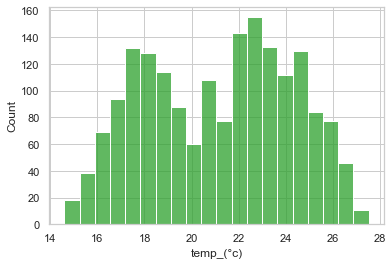

In [56]:
sns.histplot(x ='temp_(°c)',data = data_grouped1_5 ,bins = 20,color='tab:green')

# Data Visualization: folium map of sites

In [57]:
#!pip install folium

In [58]:
import folium

In [59]:
latitude= data_grouped1.latitude.value_counts()
latitude

27.2706    1199
27.1719     709
27.6111     691
27.8454     592
27.1804     577
27.6092     471
27.9354     403
26.3884     396
28.4461     341
26.3679     312
Name: latitude, dtype: int64

In [60]:
latitude= pd.DataFrame(data=latitude).reset_index()
latitude.rename(columns = {'index':'lati', 'latitude':'todrop'}, inplace = True)

In [61]:
latitude

,lati,todrop
0,27.2706,1199
1,27.1719,709
2,27.6111,691
3,27.8454,592
4,27.1804,577
5,27.6092,471
6,27.9354,403
7,26.3884,396
8,28.4461,341
9,26.3679,312


In [62]:
longitude= data_grouped1.longitude.value_counts()
longitude= pd.DataFrame(data=longitude).reset_index()
longitude

,index,longitude
0,48.3310,1199
1,48.4080,709
2,48.3882,691
3,48.4318,592
4,48.4097,577
5,48.3858,471
6,48.5451,403
7,48.5250,396
8,48.7087,341
9,48.5220,312


In [63]:
longitude.rename(columns = {'index':'longi', 'longitude':'todrop2'}, inplace = True)
longitude

,longi,todrop2
0,48.3310,1199
1,48.4080,709
2,48.3882,691
3,48.4318,592
4,48.4097,577
5,48.3858,471
6,48.5451,403
7,48.5250,396
8,48.7087,341
9,48.5220,312


In [64]:
lat_long= pd.concat([latitude, longitude], axis=1)
lat_long_dro=lat_long.drop(['todrop', 'todrop2'], axis=1)
lat_long_dro

,lati,longi
0,27.2706,48.3310
1,27.1719,48.4080
2,27.6111,48.3882
3,27.8454,48.4318
4,27.1804,48.4097
5,27.6092,48.3858
6,27.9354,48.5451
7,26.3884,48.5250
8,28.4461,48.7087
9,26.3679,48.5220


In [65]:
# I should make a list of two values lat and long 

In [313]:
locations = list(zip(lat_long_dro["lati"].values.tolist(),(-lat_long_dro["longi"]).values.tolist()))

In [314]:
m2 = folium.Map(location=[26.3679, -48.5220],zoom_start=5)
tooltip = "Click me!"

for index, loc in enumerate(locations):
    folium.Marker(loc, popup="<d> "+str(index+1)+"  </d>", tooltip=tooltip).add_to(m2) 

In [321]:
data2.head()

,id,site,latitude,longitude,date,time,temp_(°c),depth,year,day_of_y,hour,minute
0,1,Ilha Deserta,27.2706,48.331,2013-02-20,2022-06-29 11:40:02,24.448,12.0,2013,51,11,40
1,2,Ilha Deserta,27.2706,48.331,2013-02-20,2022-06-29 12:00:03,24.448,12.0,2013,51,12,0
2,3,Ilha Deserta,27.2706,48.331,2013-02-20,2022-06-29 12:20:04,24.545,12.0,2013,51,12,20
3,4,Ilha Deserta,27.2706,48.331,2013-02-20,2022-06-29 12:40:05,24.448,12.0,2013,51,12,40
4,5,Ilha Deserta,27.2706,48.331,2013-02-20,2022-06-29 13:00:06,24.351,12.0,2013,51,13,0


In [329]:
data2.iloc[0,2]

27.2706

In [330]:
locations = []
for site in data2['site'].unique().tolist():
    index = np.where(data2['site']==site)[0][0]
    locations.append((site,data2.iloc[index,2],data2.iloc[index,3]))
locations

[('Ilha Deserta', 27.2706, 48.331),
 ('Ilha da Galé', 27.1719, 48.408),
 ('Ilha do Coral', 27.9354, 48.5451),
 ('Ilha dos Lobos', 28.4461, 48.7087),
 ('Moleques do Sul', 27.8454, 48.4318),
 ('Parcel da Pombinha', 27.1804, 48.4097),
 ('Parcel do Xavier ', 27.6111, 48.3882),
 ('Tamboretes', 26.3884, 48.525),
 ('lha do Xavier', 27.6092, 48.3858)]

In [335]:
m3 = folium.Map(location=[-27.6111, -48.3882],zoom_start=7)

for location in locations:
    folium.Marker(location=[-location[1],-location[2]], popup="<d> "+location[0]+"</d>").add_to(m3)
#tooltip = "Click me!"

#folium.Marker([27.2706, -48.3310], popup="<d> first place </d>", tooltip=tooltip
#).add_to(m2)

#folium.Marker([27.8454, -48.4318], popup="<d> 4 place </d>", tooltip=tooltip
#).add_to(m2)
#folium.Marker([26.3679, -48.5220], popup="<d> last place </d>", tooltip=tooltip
#).add_to(m2)
m3

In [316]:
m2

In [336]:
m3.save("MapProject.html")


# Time series

In [71]:
data_grouped2


,date,site,temp_(°c)
0,2012-12-17,Tamboretes,25.679765
1,2012-12-18,Moleques do Sul,21.792656
2,2012-12-18,Tamboretes,25.711146
3,2012-12-19,Moleques do Sul,22.871639
4,2012-12-19,Tamboretes,24.904347
...,...,...,...
4406,2015-01-22,Parcel do Xavier,26.535319
4407,2015-01-23,Parcel do Xavier,25.888903
4408,2015-01-24,Parcel do Xavier,25.637833
4409,2015-01-25,Parcel do Xavier,24.488653


In [72]:
data_grouped_ts=data_grouped2.copy()
data_grouped_ts
data_grouped_ts['site'].value_counts()

Parcel do Xavier      691
Ilha Deserta          670
Parcel da Pombinha    577
Ilha da Galé          504
lha do Xavier         435
Ilha do Coral         403
Tamboretes            396
Moleques do Sul       394
Ilha dos Lobos        341
Name: site, dtype: int64

In [73]:
# select only one site "Parcel do Pombinha"
data_grouped_ts=data_grouped_ts[data_grouped_ts['site']=='Parcel da Pombinha']
data_grouped_ts           

,date,site,temp_(°c)
550,2013-05-10,Parcel da Pombinha,22.895027
558,2013-05-11,Parcel da Pombinha,22.874889
566,2013-05-12,Parcel da Pombinha,22.910667
574,2013-05-13,Parcel da Pombinha,22.901333
582,2013-05-14,Parcel da Pombinha,22.890667
...,...,...,...
4347,2014-12-10,Parcel da Pombinha,18.152167
4350,2014-12-11,Parcel da Pombinha,17.803542
4353,2014-12-12,Parcel da Pombinha,17.748125
4356,2014-12-13,Parcel da Pombinha,17.664972


In [74]:
#sort by date

In [75]:
data_grouped_ts.sort_values(by='date', inplace=True)

In [76]:

data_grouped_ts.reset_index(inplace=True, drop=True)
data_grouped_ts

,date,site,temp_(°c)
0,2013-05-10,Parcel da Pombinha,22.895027
1,2013-05-11,Parcel da Pombinha,22.874889
2,2013-05-12,Parcel da Pombinha,22.910667
3,2013-05-13,Parcel da Pombinha,22.901333
4,2013-05-14,Parcel da Pombinha,22.890667
...,...,...,...
572,2014-12-10,Parcel da Pombinha,18.152167
573,2014-12-11,Parcel da Pombinha,17.803542
574,2014-12-12,Parcel da Pombinha,17.748125
575,2014-12-13,Parcel da Pombinha,17.664972


In [77]:
data_grouped_ts['date_shift'] = data_grouped_ts['date'].shift()
data_grouped_ts['diff'] = data_grouped_ts['date'] - data_grouped_ts['date_shift'] 

In [78]:
data_grouped_ts[data_grouped_ts['diff'] != '1 days 00:00:00'].index

Int64Index([0, 174], dtype='int64')

In [79]:
na_dates = data_grouped_ts[data_grouped_ts['diff'] != '1 days 00:00:00'].index.tolist()[1:]
na_dates

[174]

In [80]:
data_grouped_ts.loc[[174]]

,date,site,temp_(°c),date_shift,diff
174,2013-11-07,Parcel da Pombinha,21.681282,2013-10-30,8 days


In [81]:
data_grouped_ts.loc[[173, 174, 175]]

,date,site,temp_(°c),date_shift,diff
173,2013-10-30,Parcel da Pombinha,21.016017,2013-10-29,1 days
174,2013-11-07,Parcel da Pombinha,21.681282,2013-10-30,8 days
175,2013-11-08,Parcel da Pombinha,21.851583,2013-11-07,1 days


 there is on date for which the time interval is not one single day bit 8.

# Fix the missing dates

In order to fix these missing dates, we will start create a new set of indexes which will cover all the possible dates between the first date and the last date in the dataset. Of course, the values will be missing, but then we can combine the new dataset with the old one.

In [82]:
idx = pd.date_range(data_grouped_ts["date"].min(), data_grouped_ts["date"].max())
data_grouped_ts_noNaN = data_grouped_ts.reindex(idx)
display(data_grouped_ts_noNaN.head())

data_grouped_ts_noNaN = data_grouped_ts_noNaN.reset_index()
display(data_grouped_ts_noNaN.head())

,date,site,temp_(°c),date_shift,diff
2013-05-10,NaT,NaN,NaN,NaT,NaT
2013-05-11,NaT,NaN,NaN,NaT,NaT
2013-05-12,NaT,NaN,NaN,NaT,NaT
2013-05-13,NaT,NaN,NaN,NaT,NaT
2013-05-14,NaT,NaN,NaN,NaT,NaT


,index,date,site,temp_(°c),date_shift,diff
0,2013-05-10,NaT,NaN,NaN,NaT,NaT
1,2013-05-11,NaT,NaN,NaN,NaT,NaT
2,2013-05-12,NaT,NaN,NaN,NaT,NaT
3,2013-05-13,NaT,NaN,NaN,NaT,NaT
4,2013-05-14,NaT,NaN,NaN,NaT,NaT


Let's do a merge between the new dataset and the old one.

In [83]:
data_noNaN= data_grouped_ts_noNaN.merge(data_grouped_ts, how='left', left_on='index', right_on="date")
display(data_noNaN.head())

,index,date_x,site_x,temp_(°c)_x,date_shift_x,diff_x,date_y,site_y,temp_(°c)_y,date_shift_y,diff_y
0,2013-05-10,NaT,NaN,NaN,NaT,NaT,2013-05-10,Parcel da Pombinha,22.895027,NaT,NaT
1,2013-05-11,NaT,NaN,NaN,NaT,NaT,2013-05-11,Parcel da Pombinha,22.874889,2013-05-10,1 days
2,2013-05-12,NaT,NaN,NaN,NaT,NaT,2013-05-12,Parcel da Pombinha,22.910667,2013-05-11,1 days
3,2013-05-13,NaT,NaN,NaN,NaT,NaT,2013-05-13,Parcel da Pombinha,22.901333,2013-05-12,1 days
4,2013-05-14,NaT,NaN,NaN,NaT,NaT,2013-05-14,Parcel da Pombinha,22.890667,2013-05-13,1 days


In [84]:
data_noNaN.columns

Index(['index', 'date_x', 'site_x', 'temp_(°c)_x', 'date_shift_x', 'diff_x',
       'date_y', 'site_y', 'temp_(°c)_y', 'date_shift_y', 'diff_y'],
      dtype='object')

drop things you don´t need. 

In [85]:
def fill_dates(df, date_col = "date"):

    df2 = df.copy()

    # We create a range of consecutive dates
    idx = pd.date_range(df2[date_col].min(), df2[date_col].max())

    # We reindex df2 to have the new dates
    df2 = df2.reindex(idx) # Set the index as the "Date" column
    df2 = df2.reset_index() # Add a new column named "index" with the content of index

    # Now we do a left join between the new df2 and the original based on columns date
    df2 = df2.merge(df, how='left', left_on='index', right_on=date_col)

    # From the merged dataframe, we select the columns of the old df and "index"
    new_cols = [ col for col in list(df2.columns) if ((col == "index") or ( "_y" in col)) ]
    df2 = df2[new_cols]

    # Now we strip the "_y" from the columns names
    df2.columns = [ col if ("y" not in col) else col.replace("_y","") for col in list(df2.columns) ]

    df2.index = df2['index']

    df2.drop(["index"], axis = 1, inplace = True)

    return df2

In [86]:
data_grouped_ts_noNaN = fill_dates(data_grouped_ts)
data_grouped_ts_noNaN.head()

,date,site,temp_(°c),date_shift,diff
index,,,,,
2013-05-10,2013-05-10,Parcel da Pombinha,22.895027,NaT,NaT
2013-05-11,2013-05-11,Parcel da Pombinha,22.874889,2013-05-10,1 days
2013-05-12,2013-05-12,Parcel da Pombinha,22.910667,2013-05-11,1 days
2013-05-13,2013-05-13,Parcel da Pombinha,22.901333,2013-05-12,1 days
2013-05-14,2013-05-14,Parcel da Pombinha,22.890667,2013-05-13,1 days


In [87]:
data_grouped_ts_noNaN.isna().sum()

date          7
site          7
temp_(°c)     7
date_shift    8
diff          8
dtype: int64

In [88]:
data_grouped_ts_noNaN[data_grouped_ts_noNaN['temp_(°c)'].isna()]

,date,site,temp_(°c),date_shift,diff
index,,,,,
2013-10-31,NaT,NaN,NaN,NaT,NaT
2013-11-01,NaT,NaN,NaN,NaT,NaT
2013-11-02,NaT,NaN,NaN,NaT,NaT
2013-11-03,NaT,NaN,NaN,NaT,NaT
2013-11-04,NaT,NaN,NaN,NaT,NaT
2013-11-05,NaT,NaN,NaN,NaT,NaT
2013-11-06,NaT,NaN,NaN,NaT,NaT


Let's fill missing values

In [89]:
index_na = list(data_grouped_ts_noNaN[data_grouped_ts_noNaN['temp_(°c)'].isna()].index)
index_na

[Timestamp('2013-10-31 00:00:00'),
 Timestamp('2013-11-01 00:00:00'),
 Timestamp('2013-11-02 00:00:00'),
 Timestamp('2013-11-03 00:00:00'),
 Timestamp('2013-11-04 00:00:00'),
 Timestamp('2013-11-05 00:00:00'),
 Timestamp('2013-11-06 00:00:00')]

We can get the previous day with:

p_day = data_grouped_ts_noNaN[data_grouped_ts_noNaN['temp_(°c)'].isna()].index[0] - pd.tseries.offsets.Day()
p_day

Also we can get the next day with:

p_day2 = data_grouped_ts_noNaN[data_grouped_ts_noNaN['temp_(°c)'].isna()].index[0] - pd.tseries.offsets.Day(-1)
p_day2

data_grouped_ts_noNaN.loc[[p_day,p_day2],['temp_(°c)']].mean()

data_grouped_ts_noNaN.loc[[p_day,p_day2],['temp_(°c)']]['temp_(°c)'].mean()

data_grouped_ts_noNaN.loc[p_day,:]

In [90]:
for index in list(data_grouped_ts_noNaN[data_grouped_ts_noNaN['temp_(°c)'].isna()].index):
    # Filling the missing date of column "Date"
    data_grouped_ts_noNaN.loc[index,'date'] = index
    previous_day = data_grouped_ts_noNaN.loc[index,'date'] - pd.tseries.offsets.Day()
    next_day    = data_grouped_ts_noNaN.loc[index,'date'] - pd.tseries.offsets.Day(-1)
    average = data_grouped_ts_noNaN.loc[[previous_day,next_day],['temp_(°c)']]['temp_(°c)'].mean()

data_grouped_ts_noNaN.loc[index_na,:]

,date,site,temp_(°c),date_shift,diff
index,,,,,
2013-10-31,2013-10-31,NaN,NaN,NaT,NaT
2013-11-01,2013-11-01,NaN,NaN,NaT,NaT
2013-11-02,2013-11-02,NaN,NaN,NaT,NaT
2013-11-03,2013-11-03,NaN,NaN,NaT,NaT
2013-11-04,2013-11-04,NaN,NaN,NaT,NaT
2013-11-05,2013-11-05,NaN,NaN,NaT,NaT
2013-11-06,2013-11-06,NaN,NaN,NaT,NaT


In [91]:
data_def= data_grouped_ts_noNaN.drop(['date_shift', 'diff'], axis=1)
data_def.reset_index(inplace=True,drop=True)
data_def

,date,site,temp_(°c)
0,2013-05-10,Parcel da Pombinha,22.895027
1,2013-05-11,Parcel da Pombinha,22.874889
2,2013-05-12,Parcel da Pombinha,22.910667
3,2013-05-13,Parcel da Pombinha,22.901333
4,2013-05-14,Parcel da Pombinha,22.890667
...,...,...,...
579,2014-12-10,Parcel da Pombinha,18.152167
580,2014-12-11,Parcel da Pombinha,17.803542
581,2014-12-12,Parcel da Pombinha,17.748125
582,2014-12-13,Parcel da Pombinha,17.664972


clean the NaT

In [92]:
data_def['temp_(°c)'] = data_def['temp_(°c)'].interpolate()

In [93]:
data_def.isna().sum()

date         0
site         7
temp_(°c)    0
dtype: int64

In [94]:
data_def.iloc[[175,176,177]]

,date,site,temp_(°c)
175,2013-11-01,NaN,21.182333
176,2013-11-02,NaN,21.265492
177,2013-11-03,NaN,21.348650


In [95]:
data_def=data_def.fillna('Parcel da Pombinha')

In [96]:
data_def.iloc[[175,176,177]]

,date,site,temp_(°c)
175,2013-11-01,Parcel da Pombinha,21.182333
176,2013-11-02,Parcel da Pombinha,21.265492
177,2013-11-03,Parcel da Pombinha,21.348650


In [97]:
data_def['site'].value_counts()

Parcel da Pombinha    584
Name: site, dtype: int64

In [98]:
data_def.isna().sum()

date         0
site         0
temp_(°c)    0
dtype: int64

Cleanig done!!

# Time series visualization

In [344]:
fig = px.line(data_def, x="date", y="temp_(°c)", title='Temperature vs time') #line plot
fig.show()

# Checking for stationarity

In [100]:
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", lags = "auto") # In later versions, the "lags" option has been replaced by "nlags"
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [101]:
adf_test(data_def['temp_(°c)'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.832433
p-value                          0.053788
#Lags Used                       8.000000
Number of Observations Used    575.000000
Critical Value (1%)             -3.441774
Critical Value (5%)             -2.866580
Critical Value (10%)            -2.569454
dtype: float64


The p-value is > than 0.05. even if, the statistic: -2.82 is smaller than the critical value -3.4 we cannot reject the null Hypothesis H0 which for this thest is

H
0
:
T
S
n
o
t
s
t
a
t
i
o
n
a
r
y
 
Therefore, this time series is NOT stationary according to this test.

In [102]:
kpss(data_def['temp_(°c)'])

(0.7241920858882263,
 0.011346174010161249,
 15,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

According to this test, the p-values is 0.01 < 0.05. the test statistic is 0.72 which is higher than the critical value corresponding to a significance level of 5% = 0.46. Therefore, according to this test we DON NOT **accept the null hypothesis H0** which is:

$$H0: TS stationary$$



# Time series deep 5.0m

In [103]:
data_grouped1_5


data_grouped_ts=data_grouped1_5.copy()
data_grouped_ts
data_grouped_ts['site'].value_counts()

# select only one site "Ilha Deserta "
data_grouped_ts=data_grouped_ts[data_grouped_ts['site']=='Ilha Deserta']
data_grouped_ts

,date,site,latitude,longitude,depth,temp_(°c)
130,2013-02-20,Ilha Deserta,27.2706,48.331,5.0,25.462125
133,2013-02-21,Ilha Deserta,27.2706,48.331,5.0,27.049708
136,2013-02-22,Ilha Deserta,27.2706,48.331,5.0,25.281667
139,2013-02-23,Ilha Deserta,27.2706,48.331,5.0,25.305542
142,2013-02-24,Ilha Deserta,27.2706,48.331,5.0,25.601347
...,...,...,...,...,...,...
1812,2014-07-29,Ilha Deserta,27.2706,48.331,5.0,20.498264
1813,2014-07-30,Ilha Deserta,27.2706,48.331,5.0,21.464069
1814,2014-07-31,Ilha Deserta,27.2706,48.331,5.0,20.833639
1815,2014-08-01,Ilha Deserta,27.2706,48.331,5.0,21.149917


In [104]:
data_grouped_ts.sort_values(by='date', inplace=True)
data_grouped_ts.reset_index(inplace=True, drop=True)
data_grouped_ts

,date,site,latitude,longitude,depth,temp_(°c)
0,2013-02-20,Ilha Deserta,27.2706,48.331,5.0,25.462125
1,2013-02-21,Ilha Deserta,27.2706,48.331,5.0,27.049708
2,2013-02-22,Ilha Deserta,27.2706,48.331,5.0,25.281667
3,2013-02-23,Ilha Deserta,27.2706,48.331,5.0,25.305542
4,2013-02-24,Ilha Deserta,27.2706,48.331,5.0,25.601347
...,...,...,...,...,...,...
524,2014-07-29,Ilha Deserta,27.2706,48.331,5.0,20.498264
525,2014-07-30,Ilha Deserta,27.2706,48.331,5.0,21.464069
526,2014-07-31,Ilha Deserta,27.2706,48.331,5.0,20.833639
527,2014-08-01,Ilha Deserta,27.2706,48.331,5.0,21.149917


In [105]:
data_grouped_ts['date_shift'] = data_grouped_ts['date'].shift()
data_grouped_ts['diff'] = data_grouped_ts['date'] - data_grouped_ts['date_shift'] 

data_grouped_ts[data_grouped_ts['diff'] != '1 days 00:00:00'].index

Int64Index([0], dtype='int64')

In [106]:
data_grouped_ts.loc[[0]]

data_def_5=data_grouped_ts

We don´t have missing values!!!

In [107]:
fig = px.line(data_def_5, x="date", y="temp_(°c)", title='Temperature vs time') #line plot
fig.show()

In [108]:
adf_test(data_def_5['temp_(°c)'])

Results of Dickey-Fuller Test:
Test Statistic                  -1.270881
p-value                          0.642387
#Lags Used                      18.000000
Number of Observations Used    510.000000
Critical Value (1%)             -3.443237
Critical Value (5%)             -2.867224
Critical Value (10%)            -2.569797
dtype: float64


In [110]:
kpss(data_def['temp_(°c)'])

(0.7241920858882263,
 0.011346174010161249,
 15,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

# ARIMA MODEL with time series deep 22

In [111]:
#(data_def['temp_(°c)'] - data_def['temp_(°c)'].shift(1)).rolling().mean().plot()
#plt.show()

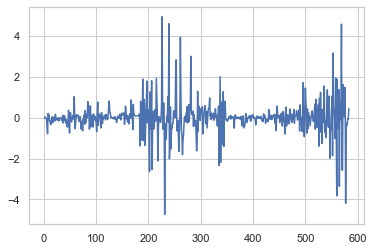

In [112]:
d1 = data_def['temp_(°c)'] - data_def['temp_(°c)'].shift(1)
d1.plot()
plt.show()

In [128]:
adf_test(d1.dropna())

Results of Dickey-Fuller Test:
Test Statistic                -1.201548e+01
p-value                        3.109658e-22
#Lags Used                     7.000000e+00
Number of Observations Used    5.750000e+02
Critical Value (1%)           -3.441774e+00
Critical Value (5%)           -2.866580e+00
Critical Value (10%)          -2.569454e+00
dtype: float64


p values is less tahn 0.05, there is stationarity

In [129]:
kpss(d1.dropna())

/Users/silviadifra/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




(0.06497046227279187,
 0.1,
 18,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

p values is more tahn 0.05, there is stationarity

/Users/silviadifra/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning:


/Users/silviadifra/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



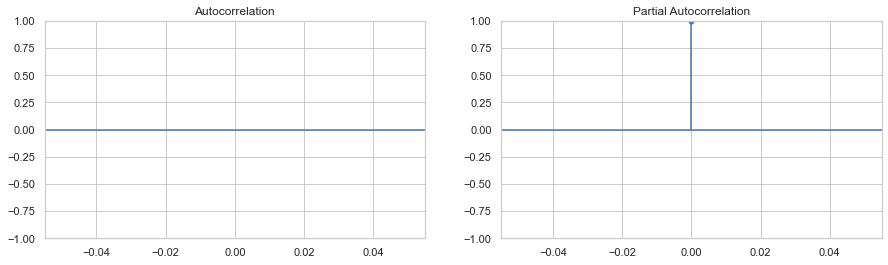

In [130]:
# ARIMA(p,d=1,q)
fig, axes = plt.subplots(1, 2, figsize=(15,4))

fig = sm.graphics.tsa.plot_acf(d1, 
                               lags=40, 
                               ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(d1 ,
                                lags=40, 
                                ax=axes[1])

In [131]:
#ARIMA(p=1,d=1,q=0)
#!pip install -U statsmodels

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

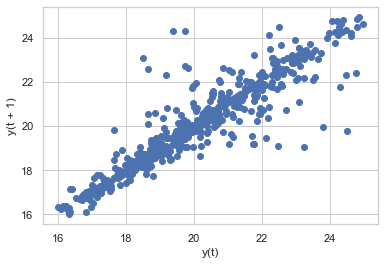

In [132]:
pd.plotting.lag_plot(data_def['temp_(°c)'])

# Splitt train test

In [133]:
import math 

max_train = math.ceil(len(data_def) * 0.80)
max_train

468

In [177]:
train = data_def.iloc[:max_train,:]['temp_(°c)']
test  = data_def.iloc[max_train:,:]['temp_(°c)']

In [178]:
train.head()
train.shape

(468,)

In [179]:
test.shape

(116,)

In [180]:
from statsmodels.tsa.arima_model import ARIMA

model = sm.tsa.arima.ARIMA(data_def['temp_(°c)'], order=(1, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              temp_(°c)   No. Observations:                  584
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -695.445
Date:                Wed, 29 Jun 2022   AIC                           1394.891
Time:                        16:24:00   BIC                           1403.627
Sample:                             0   HQIC                          1398.296
                                - 584                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0860      0.025     -3.400      0.001      -0.136      -0.036
sigma2         0.6363      0.014     45.514      0.000       0.609       0.664
Ljung-Box (L1) (Q):                   0.06   Jarque-

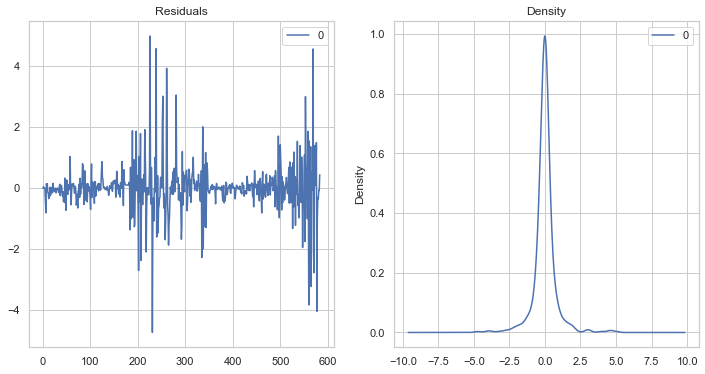

In [181]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid[1:])
fig, ax = plt.subplots(1,2, figsize =(12,6))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [182]:
ARIMA_predictions_train=model_fit.predict(start=0,end=len(train))
ARIMA_predictions_test=model_fit.predict(start=len(train),end=len(train)+len(test)-1)
ARIMA_predictions_forecast=model_fit.predict(start=len(test),end=len(test)+30)

In [183]:
[1,5,3][2]


3

In [184]:
print(model_fit.params)

ar.L1    -0.085973
sigma2    0.636256
dtype: float64


$$z(t)=-0.085973z(t-1) + 0.636256$$

$$z(t)=y(t)-y(t-1)$$

$$y(t)-y(t-1)= -0.085973(y(t-1)-y(t-2)) + 0.636256$$

$$y(t) = (1-0.085973)y(t-1) + 0.085973y(t-2) + 0.636256$$

In [185]:
data_def

,date,site,temp_(°c)
0,2013-05-10,Parcel da Pombinha,22.895027
1,2013-05-11,Parcel da Pombinha,22.874889
2,2013-05-12,Parcel da Pombinha,22.910667
3,2013-05-13,Parcel da Pombinha,22.901333
4,2013-05-14,Parcel da Pombinha,22.890667
...,...,...,...
579,2014-12-10,Parcel da Pombinha,18.152167
580,2014-12-11,Parcel da Pombinha,17.803542
581,2014-12-12,Parcel da Pombinha,17.748125
582,2014-12-13,Parcel da Pombinha,17.664972


In [186]:
data_def['date'].loc[:len(train)].values

array(['2013-05-10T00:00:00.000000000', '2013-05-11T00:00:00.000000000',
       '2013-05-12T00:00:00.000000000', '2013-05-13T00:00:00.000000000',
       '2013-05-14T00:00:00.000000000', '2013-05-15T00:00:00.000000000',
       '2013-05-16T00:00:00.000000000', '2013-05-17T00:00:00.000000000',
       '2013-05-18T00:00:00.000000000', '2013-05-19T00:00:00.000000000',
       '2013-05-20T00:00:00.000000000', '2013-05-21T00:00:00.000000000',
       '2013-05-22T00:00:00.000000000', '2013-05-23T00:00:00.000000000',
       '2013-05-24T00:00:00.000000000', '2013-05-25T00:00:00.000000000',
       '2013-05-26T00:00:00.000000000', '2013-05-27T00:00:00.000000000',
       '2013-05-28T00:00:00.000000000', '2013-05-29T00:00:00.000000000',
       '2013-05-30T00:00:00.000000000', '2013-05-31T00:00:00.000000000',
       '2013-06-01T00:00:00.000000000', '2013-06-02T00:00:00.000000000',
       '2013-06-03T00:00:00.000000000', '2013-06-04T00:00:00.000000000',
       '2013-06-05T00:00:00.000000000', '2013-06-06

In [187]:
#len( data_def['date'].loc[:len(train)-1].values )
#data_def['date'].loc[:len(train)-1].values
#len(train-2) # 468
#len(ARIMA_predictions_train[1:]) # 468
#train
ARIMA_predictions_train.shift(-1)[:-1]
#train-ARIMA_predictions_train[1:]

0      22.895026
1      22.876620
2      22.907591
3      22.902136
4      22.891584
         ...    
463    19.183627
464    18.848421
465    18.603970
466    18.708552
467    18.658742
Name: predicted_mean, Length: 468, dtype: float64

In [188]:
#len(data_def['date'].loc[len(train):].values)
#len(test)
ARIMA_predictions_test

468    18.658742
469    18.631238
470    18.349363
471    18.710272
472    19.119973
         ...    
579    18.481093
580    18.175936
581    17.833514
582    17.752889
583    17.672121
Name: predicted_mean, Length: 116, dtype: float64

In [189]:
len(test)
#len(ARIMA_predictions_train.shift(-1)[:-1])
#len(train-ARIMA_predictions_train.shift(-1)[:-1])

116

In [345]:
results_train = pd.DataFrame({'date': data_def['date'].loc[:len(train)-1].values,
                    'temp_(°c)':train, 
                     'predicted': ARIMA_predictions_train.shift(-1)[:-1], 
                     'residuals': train-ARIMA_predictions_train.shift(-1)[:-1],
                     'set': ['Train']*len(train)})
results_test = pd.DataFrame({'date': data_def['date'].loc[len(train):].values,
                    'temp_(°c)':test, 
                     'predicted': ARIMA_predictions_test, 
                     'residuals': test-ARIMA_predictions_test,
                     'set': ['Test']*len(test)})
results = pd.concat([results_train, results_test],axis= 0)
results
results.reset_index(inplace=True)
results

,index,date,temp_(°c),predicted,residuals,set
0,0,2013-05-10,22.895027,22.895026,0.000001,Train
1,1,2013-05-11,22.874889,22.876620,-0.001731,Train
2,2,2013-05-12,22.910667,22.907591,0.003076,Train
3,3,2013-05-13,22.901333,22.902136,-0.000802,Train
4,4,2013-05-14,22.890667,22.891584,-0.000917,Train
...,...,...,...,...,...,...
579,579,2014-12-10,18.152167,18.481093,-0.328927,Test
580,580,2014-12-11,17.803542,18.175936,-0.372394,Test
581,581,2014-12-12,17.748125,17.833514,-0.085389,Test
582,582,2014-12-13,17.664972,17.752889,-0.087917,Test


In [209]:
#test
ARIMA_predictions_forecast
ARIMA_predictions_forecast_df=pd.DataFrame(data=ARIMA_predictions_forecast)
ARIMA_predictions_forecast_df_ren=ARIMA_predictions_forecast_df.rename(columns={"predicted_mean": "temp_(°c)"})


In [210]:
import datetime

In [211]:
from datetime import date, timedelta
sdate = date(2014,12,15)   # start date
edate = date(2015,1,14)   # end date

In [212]:
forecast_dates=pd.date_range(sdate,edate-timedelta(days=1),freq='d')
forecast_dates

DatetimeIndex(['2014-12-15', '2014-12-16', '2014-12-17', '2014-12-18',
               '2014-12-19', '2014-12-20', '2014-12-21', '2014-12-22',
               '2014-12-23', '2014-12-24', '2014-12-25', '2014-12-26',
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-10', '2015-01-11',
               '2015-01-12', '2015-01-13'],
              dtype='datetime64[ns]', freq='D')

In [213]:
forecast_dates_df=pd.DataFrame(data=forecast_dates,columns=['date'])

In [214]:

forecast_dates_df.reset_index(drop=True)
display(forecast_dates_df.head())
display(forecast_dates_df.shape)

ARIMA_predictions_forecast_df_ren=ARIMA_predictions_forecast_df_ren.reset_index(drop=True)
display(ARIMA_predictions_forecast_df_ren.head())
ARIMA_predictions_forecast_df_ren.shape

,date
0,2014-12-15
1,2014-12-16
2,2014-12-17
3,2014-12-18
4,2014-12-19


(30, 1)

,temp_(°c)
0,16.667177
1,16.705647
2,16.829655
3,16.735798
4,16.862562


(31, 1)

In [346]:
ARIMA_forecast=pd.concat([forecast_dates_df,ARIMA_predictions_forecast_df_ren], axis=1)
ARIMA_forecast

,date,temp_(°c)
0,2014-12-15,16.667177
1,2014-12-16,16.705647
2,2014-12-17,16.829655
3,2014-12-18,16.735798
4,2014-12-19,16.862562
5,2014-12-20,16.938510
6,2014-12-21,16.976956
7,2014-12-22,16.906181
8,2014-12-23,17.038422
9,2014-12-24,17.587692


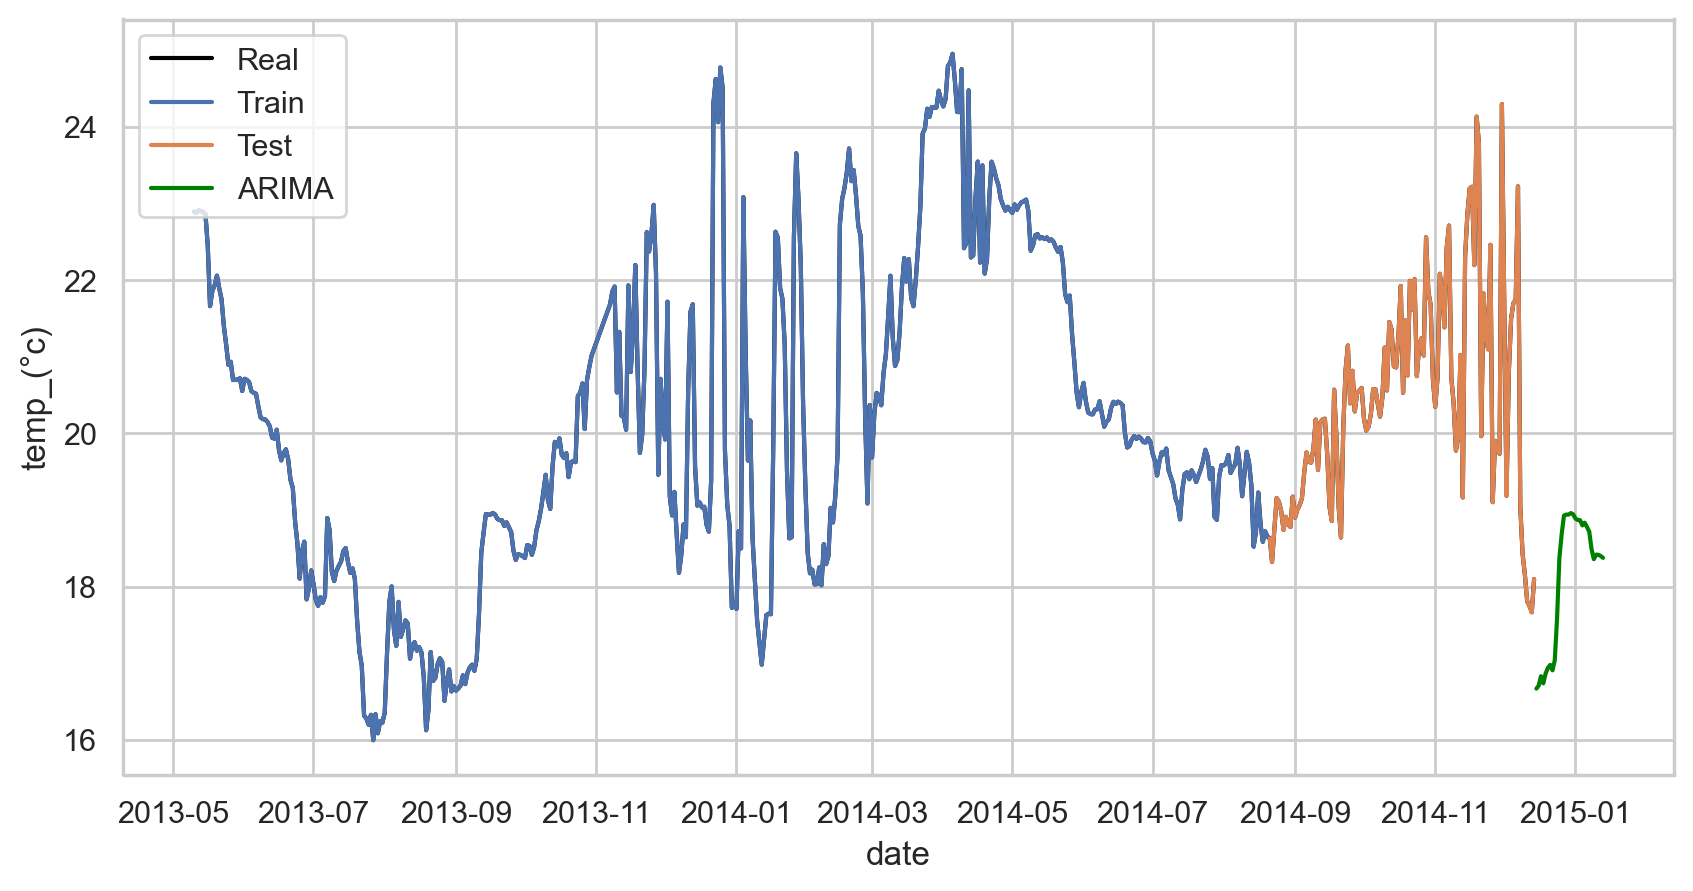

In [221]:
#%matplotlib notebook
fig, ax = plt.subplots(figsize=(10,5),dpi=200)
sns.lineplot(data=data_def, x='date', y='temp_(°c)', color = "black", ax = ax, label="Real")
sns.lineplot(data=results, x='date', y='temp_(°c)', hue = "set", ax = ax)
sns.lineplot(data=ARIMA_forecast, x='date', y='temp_(°c)',color = "green", ax = ax, label="ARIMA")
plt.legend(loc=2)
plt.show()

In [217]:
# SARIMA(p,d,q,P,D,Q,m=365)

In [222]:
results.head()

,index,date,temp_(°c),predicted,residuals,set
0,0,2013-05-10,22.895027,22.895026,0.000001,Train
1,1,2013-05-11,22.874889,22.876620,-0.001731,Train
2,2,2013-05-12,22.910667,22.907591,0.003076,Train
3,3,2013-05-13,22.901333,22.902136,-0.000802,Train
4,4,2013-05-14,22.890667,22.891584,-0.000917,Train


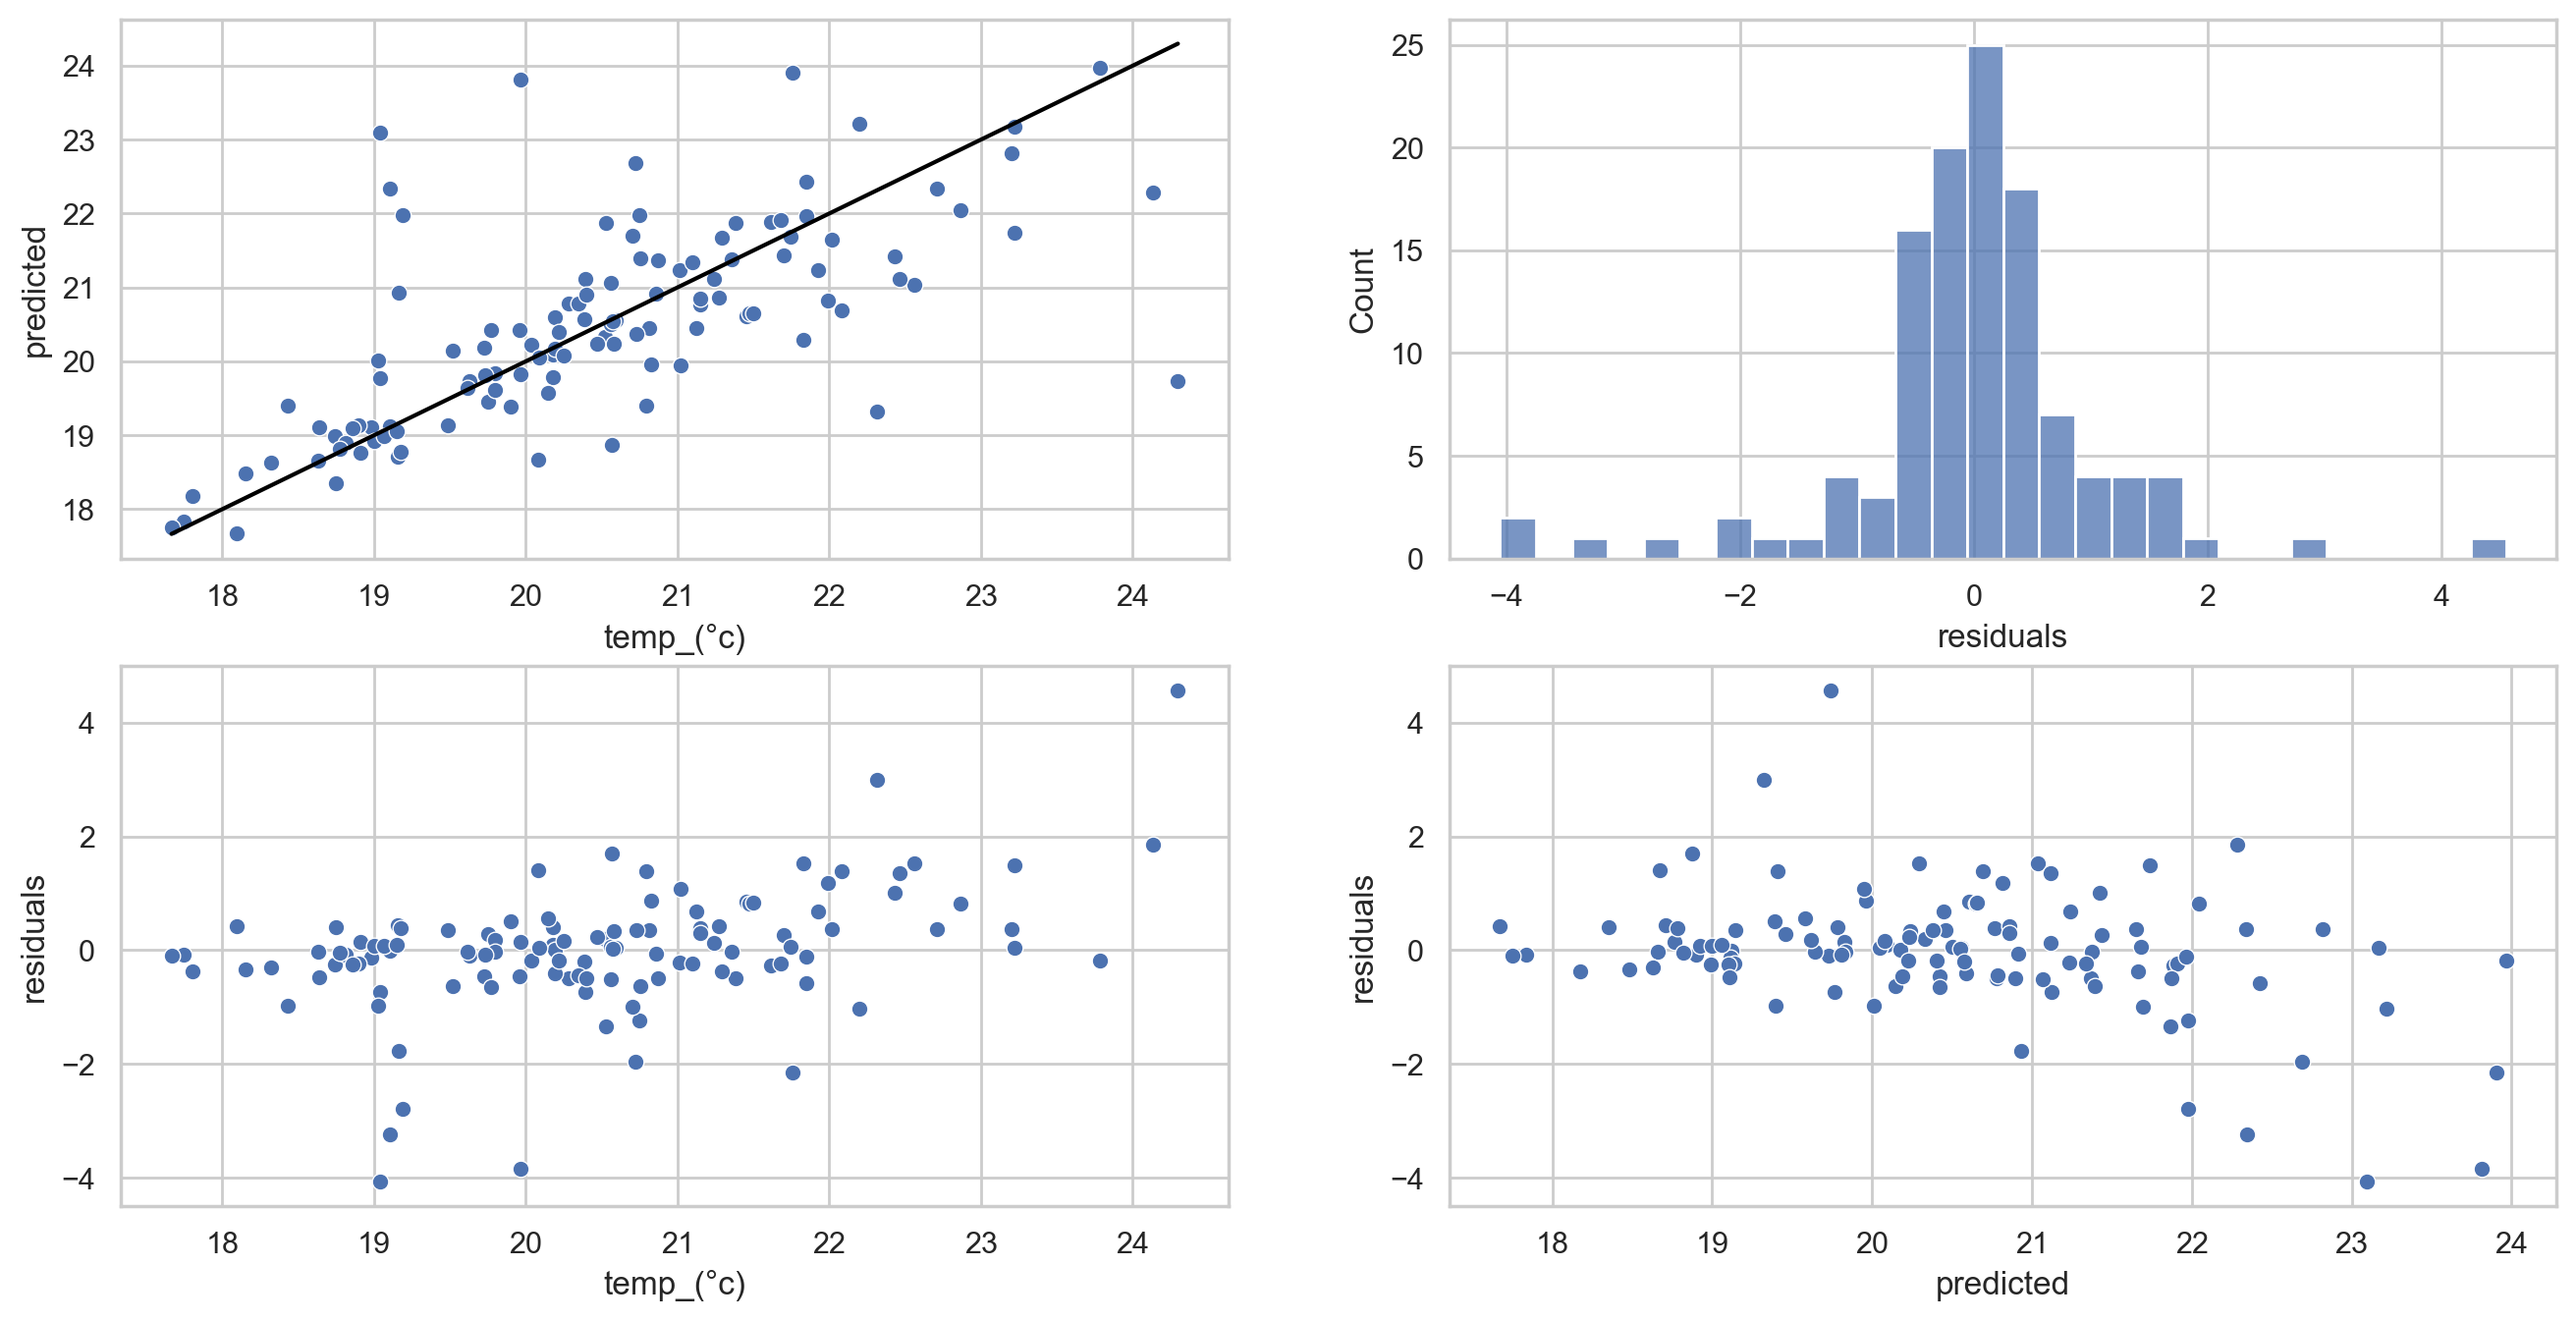

In [223]:
fig, ax = plt.subplots(2,2,figsize=(16,8), dpi=200)
sns.scatterplot(data = results_test, y="predicted", x="temp_(°c)",ax=ax[0,0]);
sns.lineplot(data= results_test,x='temp_(°c)',y='temp_(°c)',color='black' ,ax=ax[0,0]);
sns.histplot(data = results_test, x="residuals",ax=ax[0,1]);
sns.scatterplot(data = results_test, y="residuals", x="temp_(°c)",ax=ax[1,0]);
sns.scatterplot(data = results_test, y="residuals", x="predicted",ax=ax[1,1]);
plt.show()

In [224]:
#plotly

# FACEBOOK’S PROPHET model

In [ ]:
#!pip install pystan


In [225]:
!pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  ERROR: Command errored out with exit status 1:
   command: /Users/silviadifra/opt/anaconda3/bin/python -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/2b/pl6pxkts27ndv0n10fzpqb5m0000gn/T/pip-install-ns85kjrt/fbprophet_2916cb3b1d734e3cafc327e788f81870/setup.py'"'"'; __file__='"'"'/private/var/folders/2b/pl6pxkts27ndv0n10fzpqb5m0000gn/T/pip-install-ns85kjrt/fbprophet_2916cb3b1d734e3cafc327e788f81870/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/2b/pl6pxkts27ndv0n10fzpqb5m0000gn/T/pip-wheel-3sbcwb02
       cwd: /private/var/folders/2b/pl6pxkts27ndv0n10fzpqb5m0000gn/T/pip-install-ns85kjrt/fbprophet_2916cb3b1d734e3cafc327e788f81870/
  Complete o

Failed to build fbprophet
    Running setup.py install for fbprophet ... error
    ERROR: Command errored out with exit status 1:
     command: /Users/silviadifra/opt/anaconda3/bin/python -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/2b/pl6pxkts27ndv0n10fzpqb5m0000gn/T/pip-install-ns85kjrt/fbprophet_2916cb3b1d734e3cafc327e788f81870/setup.py'"'"'; __file__='"'"'/private/var/folders/2b/pl6pxkts27ndv0n10fzpqb5m0000gn/T/pip-install-ns85kjrt/fbprophet_2916cb3b1d734e3cafc327e788f81870/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /private/var/folders/2b/pl6pxkts27ndv0n10fzpqb5m0000gn/T/pip-record-s_100s65/install-record.txt --single-version-externally-managed --compile --install-headers /Users/silviadifra/opt/

In [ ]:
# check prophet version
import fbprophet
# print version number
print('Prophet %s' % fbprophet.__version__)

In [ ]:
from fbprophet import Prophet

In [ ]:
data_fb = data_def[['date', 'temp_(°c)']] 
data_fb.head()

In [ ]:
data_fb.columns = ['ds', 'y']
data_fb.head()

In [ ]:
# define the model
model = Prophet()
# fit the model
model.fit(data_fb)

In [236]:
future = list()
for i in range(1):
    date = pd.date_range(sdate,edate-timedelta(days=1),freq='d')
    future.append(date)
    
future = pd.DataFrame(future).T
future
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])
future.head()

,ds
0,2014-12-15
1,2014-12-16
2,2014-12-17
3,2014-12-18
4,2014-12-19


# Computing error metrics

In time series forecasting, Mean Absolute Scaled Error (MASE) is a measure for determining the effectiveness of forecasts generated through an algorithm by comparing the predictions with the output of a naïve forecasting approach.

In [226]:
results_test=results[results['set']== 'Test']
results_test.head()

,index,date,temp_(°c),predicted,residuals,set
468,468,2014-08-21,18.629194,18.658742,-0.029548,Test
469,469,2014-08-22,18.323042,18.631238,-0.308196,Test
470,470,2014-08-23,18.746694,18.349363,0.397332,Test
471,471,2014-08-24,19.155083,18.710272,0.444812,Test
472,472,2014-08-25,19.107431,19.119973,-0.012542,Test


In [227]:
results_test['1difference'] = np.abs(results_test['temp_(°c)'] - results_test['temp_(°c)'].shift(1))
results_test.head()

/var/folders/2b/pl6pxkts27ndv0n10fzpqb5m0000gn/T/ipykernel_26975/4045288942.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,index,date,temp_(°c),predicted,residuals,set,1difference
468,468,2014-08-21,18.629194,18.658742,-0.029548,Test,NaN
469,469,2014-08-22,18.323042,18.631238,-0.308196,Test,0.306153
470,470,2014-08-23,18.746694,18.349363,0.397332,Test,0.423653
471,471,2014-08-24,19.155083,18.710272,0.444812,Test,0.408389
472,472,2014-08-25,19.107431,19.119973,-0.012542,Test,0.047653


In [228]:
quotient_test = results_test['1difference'].mean()
quotient_test

0.6972051932367151

In [229]:
results_test['q'] = np.abs(results_test['residuals'])/quotient_test
results_test.head()

/var/folders/2b/pl6pxkts27ndv0n10fzpqb5m0000gn/T/ipykernel_26975/829747355.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,index,date,temp_(°c),predicted,residuals,set,1difference,q
468,468,2014-08-21,18.629194,18.658742,-0.029548,Test,NaN,0.042381
469,469,2014-08-22,18.323042,18.631238,-0.308196,Test,0.306153,0.442045
470,470,2014-08-23,18.746694,18.349363,0.397332,Test,0.423653,0.569892
471,471,2014-08-24,19.155083,18.710272,0.444812,Test,0.408389,0.637993
472,472,2014-08-25,19.107431,19.119973,-0.012542,Test,0.047653,0.017989


In [230]:
results_train=results[results['set']== 'Train']
results_train.head()

,index,date,temp_(°c),predicted,residuals,set
0,0,2013-05-10,22.895027,22.895026,0.000001,Train
1,1,2013-05-11,22.874889,22.876620,-0.001731,Train
2,2,2013-05-12,22.910667,22.907591,0.003076,Train
3,3,2013-05-13,22.901333,22.902136,-0.000802,Train
4,4,2013-05-14,22.890667,22.891584,-0.000917,Train


In [231]:
results_train['1difference'] = np.abs(results_train['temp_(°c)'] - results_train['temp_(°c)'].shift(1))
results_train.head()

/var/folders/2b/pl6pxkts27ndv0n10fzpqb5m0000gn/T/ipykernel_26975/1441262453.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,index,date,temp_(°c),predicted,residuals,set,1difference
0,0,2013-05-10,22.895027,22.895026,0.000001,Train,NaN
1,1,2013-05-11,22.874889,22.876620,-0.001731,Train,0.020138
2,2,2013-05-12,22.910667,22.907591,0.003076,Train,0.035778
3,3,2013-05-13,22.901333,22.902136,-0.000802,Train,0.009333
4,4,2013-05-14,22.890667,22.891584,-0.000917,Train,0.010667


In [232]:
quotient_train = results_train['1difference'].mean()
quotient_train

0.3656743084090516

In [233]:
results_train['q'] = np.abs(results_train['residuals'])/quotient_train
results_train.head()

/var/folders/2b/pl6pxkts27ndv0n10fzpqb5m0000gn/T/ipykernel_26975/980162795.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,index,date,temp_(°c),predicted,residuals,set,1difference,q
0,0,2013-05-10,22.895027,22.895026,0.000001,Train,NaN,0.000003
1,1,2013-05-11,22.874889,22.876620,-0.001731,Train,0.020138,0.004735
2,2,2013-05-12,22.910667,22.907591,0.003076,Train,0.035778,0.008412
3,3,2013-05-13,22.901333,22.902136,-0.000802,Train,0.009333,0.002194
4,4,2013-05-14,22.890667,22.891584,-0.000917,Train,0.010667,0.002508


In [234]:
MASE_test = results_test['q'].mean()
print("The MASE test of the ARIMA model is: {:.2f}".format(MASE_test))

The MASE test of the ARIMA model is: 0.97


In [235]:
MASE_train = results_train['q'].mean()
print("The MASE train of the ARIMA model is: {:.2f}".format(MASE_train))

The MASE train of the ARIMA model is: 0.09


The MASE should be lower tha 1! So it´s very low error for the train set and <1 still for the test set: the model is trustable! 